# **Malaria Detection**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
Malaria, a life-threatening disease caused by the Plasmodium parasite, continues to pose a significant global health challenge. The World Health Organization (WHO) reports that in 2021, nearly half of the world's population was at risk of malaria. This risk is further underscored by an alarming estimate of 247 million cases worldwide during the same year. The gravity of the situation is evident in the estimated 619,000 malaria-related deaths in 2021.

A hard observation is the disproportionate burden borne by the WHO African Region, which accounted for 95% of malaria cases and 96% of malaria deaths in 2021. Alarmingly, children under the age of 5 constituted approximately 80% of all malaria-related deaths in this region.

The epidemiology of malaria is complex, primarily facilitated by the bites of infected female Anopheles mosquitoes with **Plasmodium** parasites.

Recognizing the challenges in early identification, the WHO emphasizes the elusive nature of initial malaria symptoms, often resembling common febrile illnesses. This inherent difficulty in recognizing malaria necessitates a robust diagnostic approach. Left untreated, **Plasmodium** malaria can swiftly progress to severe illness and death within 24 hours, underscoring the critical importance of timely intervention.

At the heart of effective malaria management lies the early diagnosis and treatment of the disease. The WHO recommends confirming malaria in all suspected cases using parasite-based diagnostic testing. This can be achieved through either microscopy or rapid diagnostic tests. Notably, these diagnostic methods play a pivotal role in distinguishing between blood images with and without the presence of **Plasmodium** parasites, facilitating prompt and targeted medical intervention.

Compounding this issue is the fact that hundreds of millions of blood films undergo examination for malaria. This process entails the manual counting of parasites and infected red blood cells, a task performed by trained microscopists. The accuracy of parasite counts holds crucial significance not only in the diagnosis of malaria but also in assessments related to drug resistance, gauging drug effectiveness, and determining disease severity. However, the practice of microscopic diagnostics lacks standardization and heavily relies on the expertise and proficiency of the microscopist, underscoring the need for advancements in techniques such as image analysis and machine learning for malaria detection (Poostchi, Silamut, Maude, Jaeger, Thoma, 2018).

In the broader context of a project involving microscopic blood images, the significance becomes clear. By leveraging advanced imaging techniques and diagnostic tools, researchers can contribute to the early identification of Plasmodium parasites in blood samples, and add levels of complexity on the diagnosis. This not only aligns with the WHO's emphasis on early diagnosis but also holds the potential to revolutionize malaria management strategies, ultimately reducing the global burden of this debilitating disease.

**The objectives:** What is the intended goal?<br>

The primary goal of this project is to leverage data science techniques to identify the presence of Plasmodium in blood samples. The successful achievement of this goal would enable early diagnosis of malaria, aligning with WHO recommendations and potentially leading to a significant reduction in mortality rates associated with the disease.

**The key questions:** What are the key questions that need to be answered?<br>

1. How can we effectively differentiate between microscopic blood images containing Plasmodium parasites (Parasitized) and those without (Uninfected)?
2. What features and patterns in the images can serve as reliable indicators for the presence of Plasmodium?
3. How can the accuracy and efficiency of the diagnostic process be improved through data science methodologies?

**The problem formulation:** What is it that we are trying to solve using data science?

This project focuses on formulating a solution through data science. The objective is to construct a robust and precise model capable of autonomously identifying **Plasmodium** in blood samples. Employing advanced machine learning and image analysis methodologies on the available dataset of microscopic images, the goal is to develop a diagnostic tool. This tool should be designed to facilitate early detection of malaria, aligning with global initiatives to alleviate the consequences of this severe and life-threatening disease.

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


###<b> Mount the Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import PIL
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model # Sequential API for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # Regularization method to prevent the overfitting
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend

from tensorflow.keras.applications.vgg19 import VGG19

import os

import random

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras import backend

### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [3]:
# Fixing the seed for random number generators:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [4]:
import zipfile

# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/MIT - PE ADSP/Capstone/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

In [5]:
# Specify the path to the folder containing the images
folder_path = '/content/cell_images'  # Change this to the actual folder path

# List all files in the folder
file_list = os.listdir(folder_path)

# Display the total number of files
print("\nTotal number of files:", len(file_list))



Total number of files: 2


In [6]:
import pathlib
test_folder = '/content/cell_images/test'
data_dir = pathlib.Path(test_folder)

# Specify the subfolders of interest
subfolders_of_interest = ['parasitized', 'uninfected']

# Count the number of images inside each specified subfolder
for category in subfolders_of_interest:
    subfolder_path = data_dir / category
    image_count = len(list(subfolder_path.glob('*.png')))
    print(f"Subfolder {subfolder_path}: {image_count} images")


Subfolder /content/cell_images/test/parasitized: 1300 images
Subfolder /content/cell_images/test/uninfected: 1300 images


In [7]:
import pathlib
train_folder = '/content/cell_images/train'
data_dir = pathlib.Path(train_folder)

# Specify the subfolders of interest
CATEGORIES = ['parasitized', 'uninfected']

# Count the number of images inside each specified subfolder
for category in CATEGORIES:
    subfolder_path = data_dir / category
    image_count = len(list(subfolder_path.glob('*.png')))
    print(f"Subfolder {subfolder_path}: {image_count} images")

Subfolder /content/cell_images/train/parasitized: 12582 images
Subfolder /content/cell_images/train/uninfected: 12376 images


The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [8]:
image0 = Image.open(test_folder + '/parasitized/' + 'C39P4thinF_original_IMG_20150622_105253_cell_106.png')

image0 = image0.resize((64,64))

image0_array = np.array(image0)

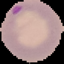

In [9]:
image0

In [10]:
# Storing the training path in a variable named DATADIR, and storing the unique categories/labels in a list

CATEGORIES = ["parasitized", "uninfected"]                              # Storing all the categories in 'CATEGORIES' variable
IMG_SIZE = 64

In [11]:
# Here we will be using a user defined function create_training_data() to extract the images from the directory
training_data = []

# Storing all the training images
def create_training_data():
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(train_folder, category)                                 # Joining images with labels
        class_num = category

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))                    # Reading the data

            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))            # Resizing the images

            training_data.append([new_array, class_num])                       # Appending both the images and labels

create_training_data()


In [12]:
# Here we will be using a user defined function create_testing_data() to extract the images from the directory
testing_data = []

# Storing all the testing images
def create_testing_data():
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(test_folder, category)                            # Joining images with labels
        class_num = category

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))                    # Reading the data

            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))            # Resizing the images

            testing_data.append([new_array, class_num])                        # Appending both the images and labels

create_testing_data()

In [13]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_train = []
y_train = []

np.random.shuffle(training_data)                                               # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in training_data:                                          # Iterating over the training data which is generated from the create_training_data() function
    X_train.append(features)                                                   # Appending images into X_train
    y_train.append(label)

In [14]:
# Creating two different lists to store the Numpy arrays and the corresponding labels
X_test = []
y_test = []

np.random.shuffle(testing_data)                                                # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in testing_data:                                           # Iterating over the training data which is generated from the create_testing_data() function
    X_test.append(features)                                                    # Appending images into X_test
    y_test.append(label)

In [15]:
# Converting the pixel values into Numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)

####<b> Observations and insights: _____

###<b> Check the shape of train and test images

In [16]:
X_train.shape

(24958, 64, 64, 3)

In [17]:
X_test.shape

(2600, 64, 64, 3)

###<b> Check the shape of train and test labels

In [18]:
# Converting the lists into DataFrames
y_train = pd.DataFrame(y_train, columns = ["Label"], dtype = object)
y_test = pd.DataFrame(y_test, columns = ["Label"], dtype = object)

In [19]:
y_train.shape

(24958, 1)

In [20]:
y_test.shape

(2600, 1)

**Observations and insights**:
* Now the images in both the training and test datasets have the proper shape. It is essential to note that CNN models require images to be in the form of 4D arrays.
* Additionally, the labels assigned to each folder were utilized to establish the classification output


### <b>Check the minimum and maximum range of pixel values for train and test images

In [21]:
X_train.min(), X_test.min()

(0, 0)

In [22]:
X_train.max(), X_test.max()

(255, 255)

**Observations and insights**:
* Each cell is represented using three color channels, following the standard 0-255 saturation scale. Consequently, the need arises to normalize these values to ensure consistency over the 255 range.



###<b> Count the number of values in both uninfected and parasitized

In [23]:
# Value Count for the Training Dataset
count_y_train = y_train.value_counts()
count_y_train

Label      
parasitized    12582
uninfected     12376
dtype: int64

In [24]:
#Value Count for the Test Dataset
count_y_test = y_test.value_counts()

###<b>Normalize the images

In [25]:
X_train_norm = X_train/255

In [26]:
X_test_norm = X_test/255

**Observations and insights**:
* Value Count Correspondence: The value count corresponds to the number of images uploaded previously from the original dataset.
* Normalization Reference: As previously verified, the normalization step had to be performed based on 255, which represents the maximum saturation level of pixels.

###<b> Plot to check if the data is balanced

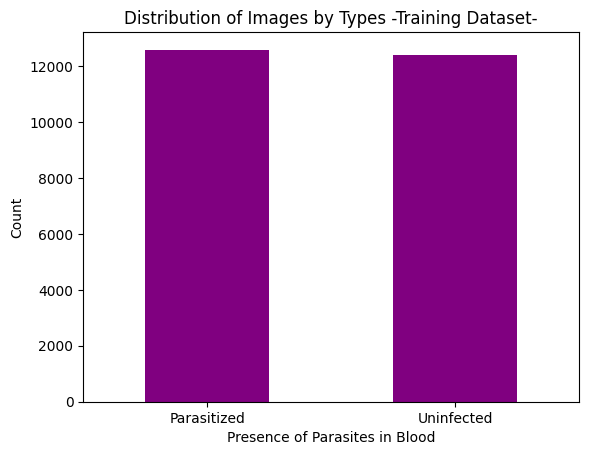

In [27]:
# Barplot representing the distribution of the target variable in the training dataset:
count_y_train.plot(kind = 'bar', color = 'purple')

plt.xlabel('Presence of Parasites in Blood')
plt.ylabel('Count')
plt.title('Distribution of Images by Types -Training Dataset-')

#Change x-axis labels
new_labels = ['Parasitized', 'Uninfected']
plt.xticks(range(len(new_labels)), new_labels, rotation = 0)

plt.show()

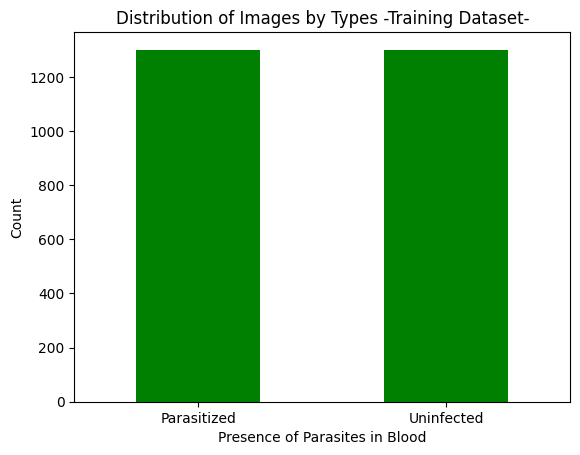

In [28]:
# Barplot representing the distribution of the target variable in the test dataset:
count_y_test.plot(kind = 'bar', color = 'green')

plt.xlabel('Presence of Parasites in Blood')
plt.ylabel('Count')
plt.title('Distribution of Images by Types -Training Dataset-')

#Change x-axis labels
new_labels = ['Parasitized', 'Uninfected']
plt.xticks(range(len(new_labels)), new_labels, rotation = 0)

plt.show()

**Observations and insights**:
* Both datasets exhibit balance in the distribution of the target variable.



### <b>Data Exploration</b>
Let's visualize the images from the train data

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

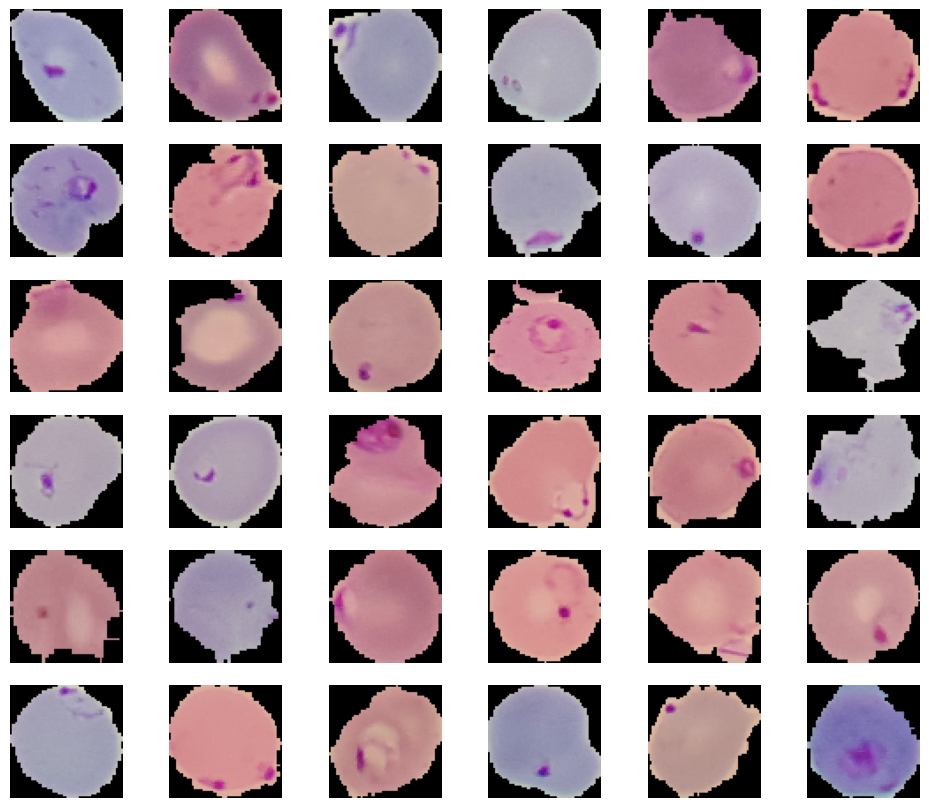

In [29]:
# Visualize Parasitized cell
parasitized_imgs = [fn for fn in os.listdir(f'{train_folder}/{CATEGORIES[0]}') ]  #CATEGORIES = ["parasitized", "uninfected"]
select_parasitized = np.random.choice(parasitized_imgs, 36, replace = False)

fig = plt.figure(figsize = (12, 12))

for i in range(36):

    ax = fig.add_subplot(7, 6, i + 1)

    fp = f'{train_folder}/{CATEGORIES[0]}/{select_parasitized[i]}'

    fn = load_img(fp, target_size = (64,64))

    plt.imshow(fn, cmap = 'Greys_r')

    plt.axis('off')

plt.show()

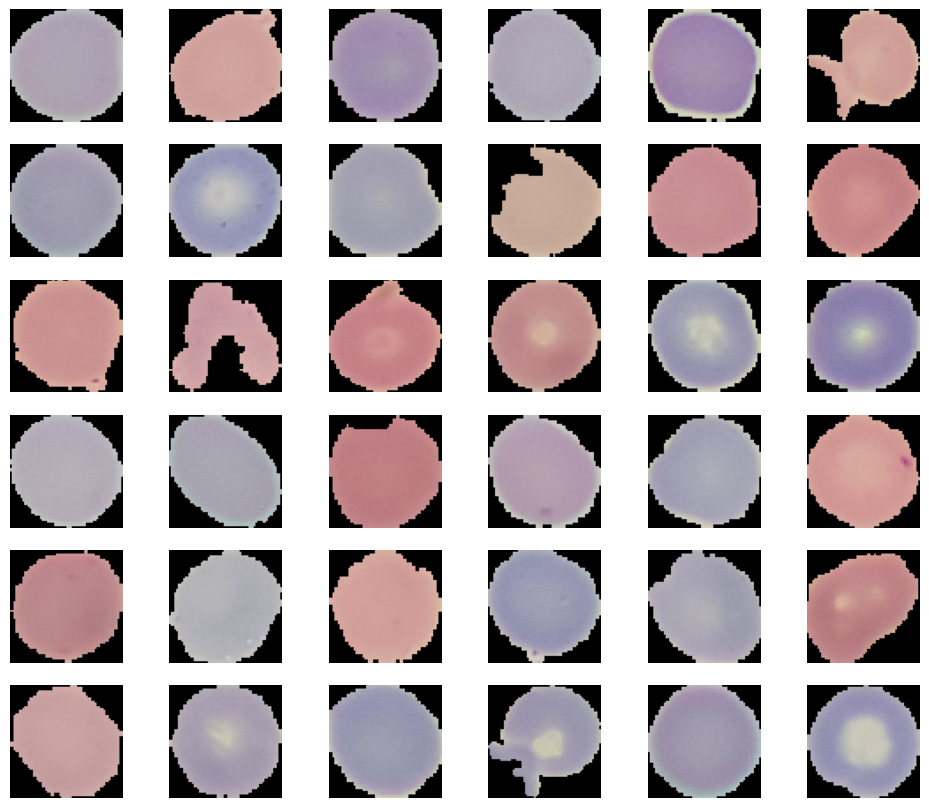

In [30]:
# Visualize uninfected cell
uninfected_imgs = [fn for fn in os.listdir(f'{train_folder}/{CATEGORIES[1]}') ] #select_parasitized
select_uninfected = np.random.choice(uninfected_imgs, 36, replace = False)

fig = plt.figure(figsize = (12, 12))

for i in range(36):
    ax = fig.add_subplot(7, 6, i + 1)

    fp = f'{train_folder}/{CATEGORIES[1]}/{select_uninfected[i]}'

    fn = load_img(fp, target_size = (64,64))

    plt.imshow(fn, cmap = 'Greys_r')

    plt.axis('off')

plt.show()

**Observations**:
* The presence of darker spots appears to be consistently associated with cells that are infected by the Malaria parasite.
* An issue that may arise is the fading shape of the darker spots, which could introduce errors in the identification process.

###<b> Plotting the mean images for parasitized and uninfected

<b> Mean image for parasitized

In [31]:
y_test_dummies = pd.get_dummies(y_test, columns = ['Label'])
y_test_dummies = y_test_dummies.rename(columns = {'Label_parasitized': 'Parasitized', 'Label_uninfected': 'Uninfected'})
y_test_dummies

Parasitized  Uninfected
0               0           1
1               0           1
2               1           0
3               0           1
4               1           0
...           ...         ...
2595            1           0
2596            1           0
2597            0           1
2598            1           0
2599            0           1

[2600 rows x 2 columns]

In [32]:
y_train_dummies = pd.get_dummies(y_train, columns = ['Label'])
y_train_dummies = y_train_dummies.rename(columns = {'Label_parasitized': 'Parasitized', 'Label_uninfected': 'Uninfected'})
y_train_dummies

Parasitized  Uninfected
0                0           1
1                1           0
2                1           0
3                1           0
4                0           1
...            ...         ...
24953            0           1
24954            1           0
24955            1           0
24956            0           1
24957            0           1

[24958 rows x 2 columns]

In [33]:
#Create tuples that match each image to its correspond label
Parasitized_zip =zip(X_train_norm, y_train_dummies['Parasitized'])
Parasitized_list = list(Parasitized_zip)

#Filter each tuple and saved the images where the cells are parasitized
filter_parasitized = [img for img, label in Parasitized_list if label == 1]

#Changing the filtered variable to array
filter_parasitized = np.array(filter_parasitized)

#Calculate the mean of the images uninfected
mean_parasitized = np.mean(filter_parasitized, axis = 0)

In [34]:
mean_parasitized.shape

(64, 64, 3)

Text(0.5, 1.0, 'Mean Image Parazitized Cells')

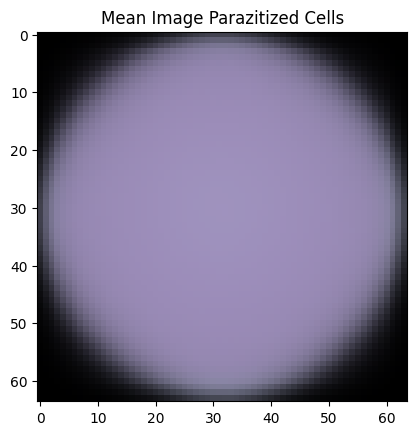

In [35]:
#Plot mean image: Parasitized
plt.imshow(mean_parasitized)
plt.title("Mean Image Parazitized Cells")

<b> Mean image for uninfected

In [36]:
#Create tuples that match each image to its correspond label
Uninfected_zip =zip(X_train_norm, y_train_dummies['Uninfected'])
Uninfected_list = list(Uninfected_zip)

#Filter each tuple and saved the images where the cells are uninfected
filter_uninfected = [img for img, label in Uninfected_list if label == 1]

#Changing the filtered variable to array
filter_uninfected = np.array(filter_uninfected)

#Calculate the mean of the images uninfected
mean_uninfected = np.mean(filter_uninfected, axis = 0)

In [37]:
mean_uninfected.shape

(64, 64, 3)

Text(0.5, 1.0, 'Mean Image Uninfected Cells')

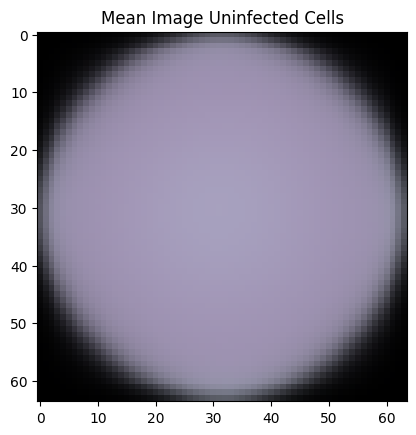

In [38]:
#Plot mean image: Uninfected
plt.imshow(mean_uninfected)
plt.title("Mean Image Uninfected Cells")

**Observations and insights:**
* The average representations of both types of cells—parasitized and uninfected—are identical. This similarity may be attributed to repetitive patterns within the images of both types. It is possible that the object the model is attempting to identify moves to different positions, while the remainder of the cell remains consistent between both cases.
* This implies it's important to preprocess the image data to something more saturated and easier to compare, for example convert the images from RGB to HSV.

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [39]:
type(X_train)

numpy.ndarray

In [40]:
# Function to convert RGB images to HSV images
def rgb_to_hsv(rgb_image):
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    return hsv_image

# Apply the conversion function to each image in X_train
X_train_hsv = np.array([rgb_to_hsv(rgb_image) for rgb_image in X_train])

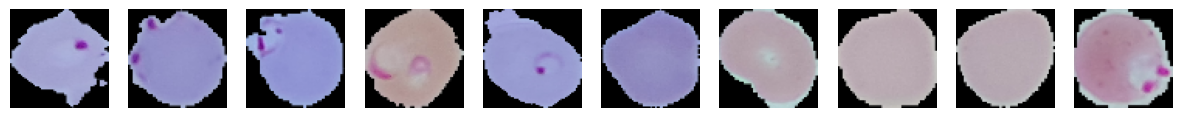

In [41]:
# Choose a random subset of matrices
num_matrices_to_choose = 10  # Adjust the number as needed
random_indices = np.random.choice(len(filter_parasitized), size=num_matrices_to_choose, replace=False)
random_indices

# Plot RGB Images
plt.figure(figsize=(15, 3))  # Adjust the figure size as needed

for i, index in enumerate(random_indices, start=1):
    plt.subplot(1, num_matrices_to_choose, i)
    plt.imshow(X_train[index])
    plt.axis('off')  # Turn off axis labels for better visualization

plt.show()

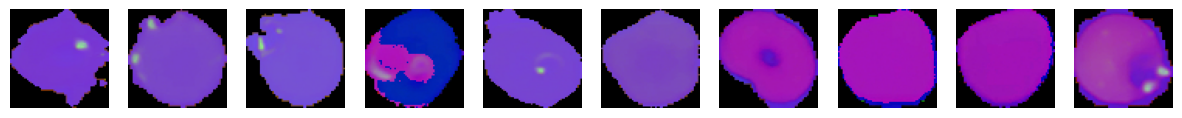

In [42]:
# Plot HSV Images
plt.figure(figsize=(15, 3))  # Adjust the figure size as needed

for i, index in enumerate(random_indices, start=1):
    plt.subplot(1, num_matrices_to_choose, i)
    plt.imshow(X_train_hsv[index])
    plt.axis('off')  # Turn off axis labels for better visualization

plt.show()

###<b> Converting the test data

In [43]:
# Apply the conversion function to each image in X_test
X_test_hsv = np.array([rgb_to_hsv(rgb_image) for rgb_image in X_test])

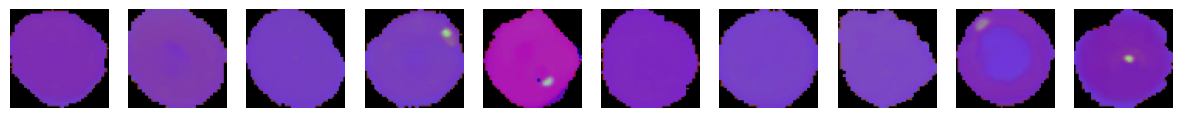

In [44]:
#Create tuples that match each image to its correspond label
Parasitized_zip_t =zip(X_test_norm, y_train_dummies['Parasitized'])
Parasitized_list_t = list(Parasitized_zip_t)

#Filter each tuple and saved the images where the cells are parasitized
filter_parasitized_t = [img for img, label in Parasitized_list_t if label == 1]

#Changing the filtered variable to array
filter_parasitized_t = np.array(filter_parasitized_t)

# Choose a random subset of matrices
num_matrices_to_choose = 10  # Adjust the number as needed
random_indices = np.random.choice(len(filter_parasitized_t), size=num_matrices_to_choose, replace=False)
random_indices

# Plot HSV Images
plt.figure(figsize=(15, 3))  # Adjust the figure size as needed

for i, index in enumerate(random_indices, start=1):
    plt.subplot(1, num_matrices_to_choose, i)
    plt.imshow(X_test_hsv[index])
    plt.axis('off')  # Turn off axis labels for better visualization

plt.show()

In [45]:
X_train_hsv.max(), X_test_hsv.max()

(255, 255)

**Observations and insights**:
* With the images now in the HSV format, creating a model to compare colors becomes more straightforward.
* The contrast introduced by this new format accentuates potential parasites in the images, making them more prominent and aiding in their identification.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [46]:
# Function to apply Gaussian Blurring
def gaussianblur (hsv_image):
    hsv_image = cv2.GaussianBlur(hsv_image, (5,5), 0)
    return hsv_image

# Apply the conversion function to each image in X_train_hsv
X_train_blur = np.array([gaussianblur(hsv_image) for hsv_image in X_train_hsv])

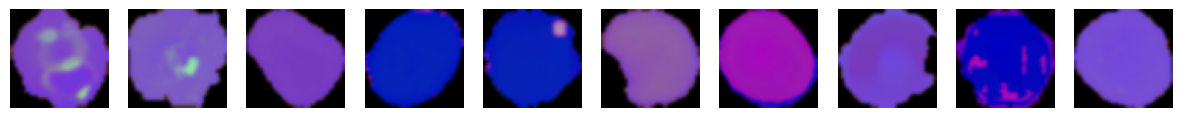

In [47]:
# Choose a random subset of matrices
num_matrices_to_choose = 10  # Adjust the number as needed
random_indices = np.random.choice(len(filter_parasitized), size=num_matrices_to_choose, replace=False)
random_indices

# Plot Blur Images
plt.figure(figsize=(15, 3))  # Adjust the figure size as needed

for i, index in enumerate(random_indices, start=1):
    plt.subplot(1, num_matrices_to_choose, i)
    plt.imshow(X_train_blur[index])
    plt.axis('off')  # Turn off axis labels for better visualization

plt.show()

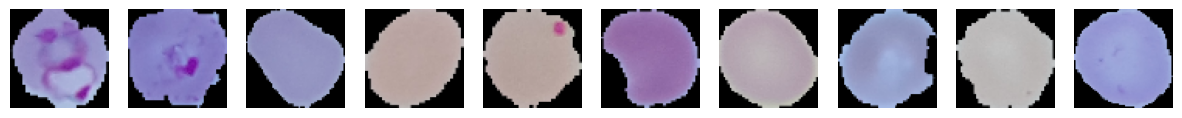

In [48]:
# Plot RGB Images
plt.figure(figsize=(15, 3))  # Adjust the figure size as needed

for i, index in enumerate(random_indices, start=1):
    plt.subplot(1, num_matrices_to_choose, i)
    plt.imshow(X_train[index])
    plt.axis('off')  # Turn off axis labels for better visualization

plt.show()

###<b> Gaussian Blurring on test data

In [49]:
# Apply the conversion function to each image in X_train_hsv
X_test_blur = np.array([gaussianblur(hsv_image) for hsv_image in X_test_hsv])

**Observations and Insights:**

* In the context of this object detection problem, the application of Gaussian Blur may lead to the smoothing of certain details. Given that the detection of parasites relies on the contrast between the consistent background and the parasites themselves, there exists a potential challenge for the model to effectively learn the relationship between the background (representing the rest of the cell) and the parasites.
* An alternative approach, more suitable for object detection, is to consider data augmentation techniques such as random rotation, scaling, translation, or changes in lighting conditions. This strategy aims to enhance the model's ability to generalize to variations in object appearance without compromising critical details.
* It is worth noting that both options, Gaussian Blur and data augmentation, should be rigorously evaluated to determine which approach yields superior results. Comparative analysis is essential to make an informed decision regarding the most effective preprocessing method for this specific object detection task.





**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

## **Model Building**

### **Base Model RGB Normalized**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [50]:
# Clearing backend

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

####<B>One Hot Encoding the train and test labels

In [51]:
#Create the variable y_train_encoded where 0: Uninfected, 1: Parasitized:
y_train_d= y_train_dummies['Parasitized']

#One hot encode the y_train_encoded just created:
y_train_encoded = to_categorical(y_train_d)

In [52]:
#Create the variable y_train_encoded where 0: Uninfected, 1: Parasitized:
y_test_d = y_test_dummies['Parasitized']

#One hot encode the y_train_encoded just created:
y_test_encoded = to_categorical(y_test_d)

###<b> Building the model

**The Model consists:**


1.   Convolutional layer with 32 filters and the kernel size of 3x3, activation function ReLu. Padding 'same' and input_shape = (64, 64,3)
2.  Max-pooling layer with pool size of 2x2 and padding 'same'
3.  Convolutional layer with 64 filters and the kernel size of 3x3, activation function ReLu. Padding 'same'
4.  Max-pooling layer with a pool size of 2x2 and a padding ‘same’
5.  Convolutional layer with 32 filters and kernel size of 3x3 with padding ’same’
6.  Max-pooling layer with a pool size of 2x2 and a padding ‘same’
7.  Flatten the output
8.  Dense layer with 32 nodes and activation function ReLu
9.  Final dense layer with 2 nodes and activation function softmax  

This model is compiled with loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'.

The model fit on the training data with a validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20.

Finally, the images used for this model are the HSV Images.

###<b> Compiling the model

In [53]:
def cnn_model_base():
  #Initializing a sequential model
  model = Sequential()

  #Adding Convolution Layer: 16 filters and a kernel size of 3x3. Activation function layer ReLu . Padding 'same' and input shape (64, 64, 3)
  model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)))

  #Adding Convolution Layer: 32 filters and a kernel size of 3x3. Activation function layer ReLu. Padding 'same'
  model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

  #Max Pooling Layer pool size 2x2
  model.add(MaxPooling2D(pool_size = (2, 2)))

  #Adding Convolution Layer: 32 filters and a kernel size of 3x3. Activation function layer ReLu. Padding 'same'
  model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

  #Adding Convolution Layer: 64 filters and a kernel size of 3x3. activation = 'relu'. Padding 'same'
  model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same'))

  #Flatten layer
  model.add(Flatten())

  #Adding a fully connected layer with 512 units
  model.add(Dense(100 , activation = 'relu'))

  #Output Layer with 2 nodes and activation function Sigmoid
  model.add(Dense(2, activation = 'sigmoid'))

  #Compiling the model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  return model

model_base_rgb = cnn_model_base()

model_base_rgb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        9280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                        

###<b> Fit and Train the Model



<b> Using Callbacks

In [54]:
# Define callbacks
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model_base_norm', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

<b> Fit and train our Model

In [55]:
history_base_rgb = model_base_rgb.fit(
  X_train_norm, y_train_encoded,
  epochs = 20,
  validation_split = 0.2,
  batch_size = 32,
  verbose = 1,
  callbacks=[mc, es]
)

Epoch 1/20
624/624 [==============================] - ETA: 0s - loss: 0.3838 - accuracy: 0.7866
Epoch 1: val_accuracy improved from -inf to 0.97496, saving model to best_model_base_norm
624/624 [==============================] - 14s 13ms/step - loss: 0.3838 - accuracy: 0.7866 - val_loss: 0.0933 - val_accuracy: 0.9750
Epoch 2/20
619/624 [============================>.] - ETA: 0s - loss: 0.0785 - accuracy: 0.9753
Epoch 2: val_accuracy improved from 0.97496 to 0.97576, saving model to best_model_base_norm
624/624 [==============================] - 7s 11ms/step - loss: 0.0784 - accuracy: 0.9752 - val_loss: 0.0681 - val_accuracy: 0.9758
Epoch 3/20
623/624 [============================>.] - ETA: 0s - loss: 0.0618 - accuracy: 0.9790
Epoch 3: val_accuracy did not improve from 0.97576
624/624 [==============================] - 6s 10ms/step - loss: 0.0618 - accuracy: 0.9790 - val_loss: 0.0739 - val_accuracy: 0.9750
Epoch 4/20
623/624 [============================>.] - ETA: 0s - loss: 0.0477 - ac

###<b> Evaluating the model

<b>**Plotting the train and validation curves:**

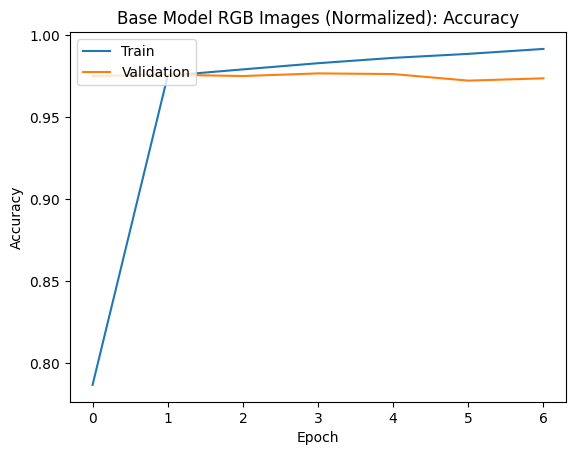

In [56]:
plt.plot(history_base_rgb.history['accuracy'])

plt.plot(history_base_rgb.history['val_accuracy'])

plt.title('Base Model RGB Images (Normalized): Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()


<b> Plotting the confusion matrix

In [57]:
#Making predictions on the test data
y_pred_test = model_base_rgb.predict(X_test_norm)

# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis =1)

82/82 [==============================] - 0s 3ms/step


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



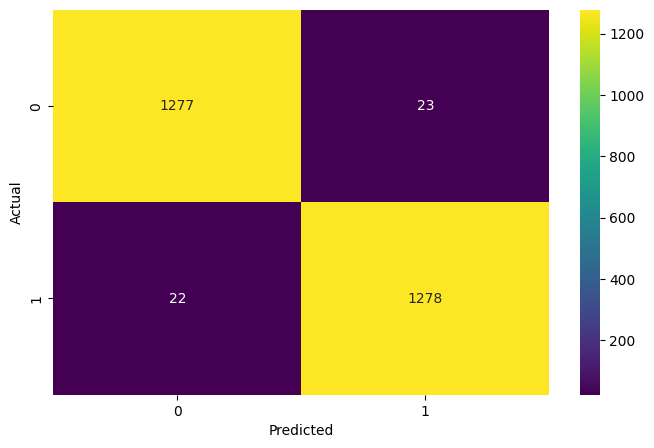

In [58]:
# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test_d, y_pred_test_classes))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test_d, y_pred_test_classes)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', cmap = 'viridis')

plt.ylabel('Actual')

plt.xlabel('Predicted')

# Display the plot
plt.show()

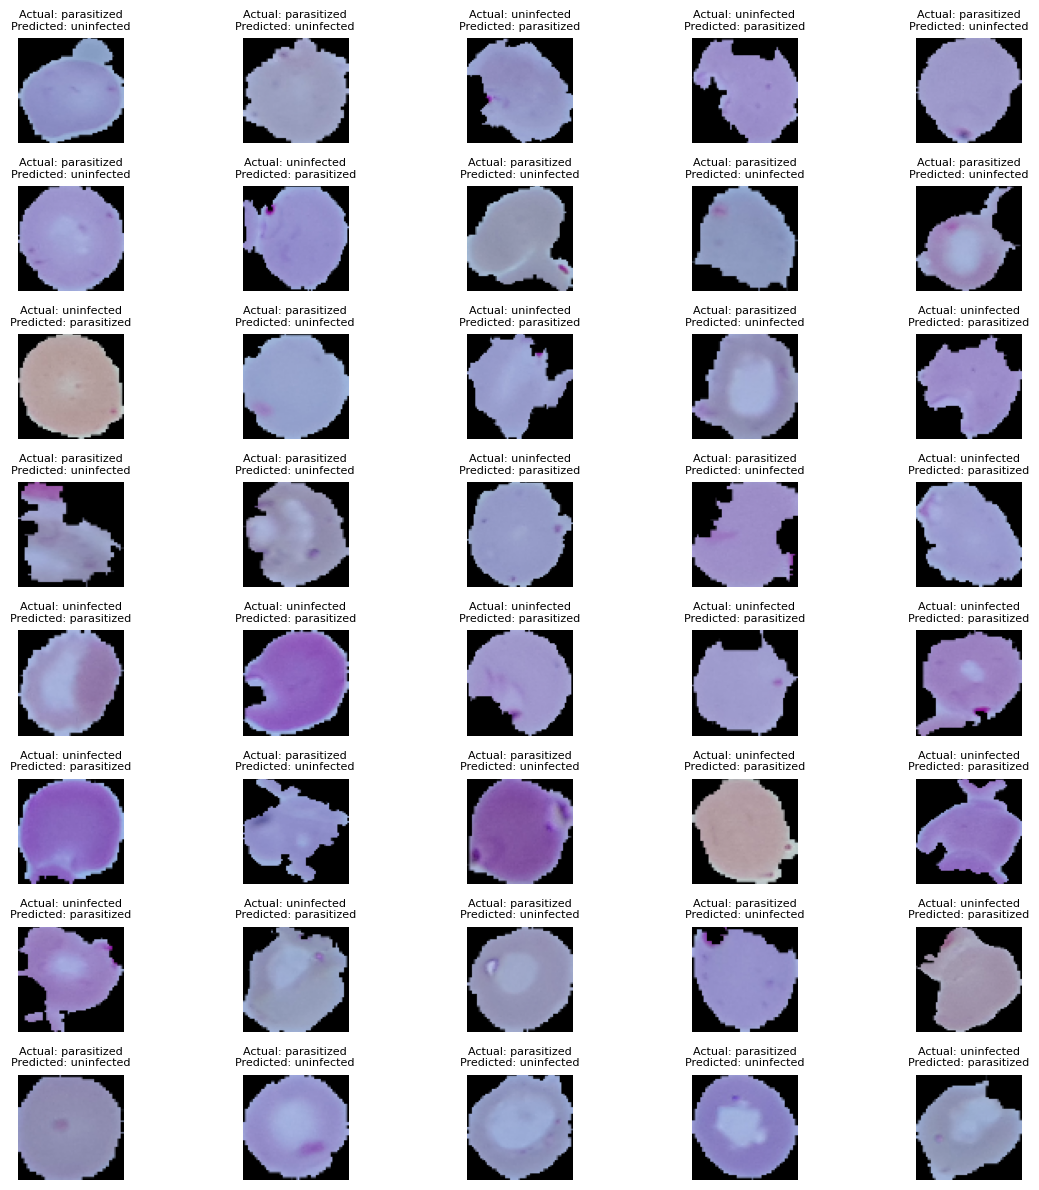

In [59]:
# Identify misclassifications
misclassified_indices = np.where(y_pred_test_classes != y_test_d)
n_plot = 40
# Take the first ten misclassified images from Actual abd Predicted Images
n_misclassified_indices = misclassified_indices[0][:n_plot]
n_misclassified_images = X_test_norm[n_misclassified_indices]

#Labels for Actual Values
actual_labels = y_test.iloc[n_misclassified_indices]
# Reset the index
actual_labels = actual_labels.reset_index()

#Labels for predicted Values
predicted_labels = y_pred_test_classes[n_misclassified_indices]

# Convert numeric labels to string labels
InfectionStatus = np.array(['uninfected' if label == 0 else 'parasitized' for label in predicted_labels])
InfectionStatus = pd.DataFrame(InfectionStatus)

# Set a larger figure size
fig1 = plt.figure(figsize=(12, 12))

# Visualize misclassified images
for i in range(n_plot):
    plt.subplot(8, 5 , i + 1)
    plt.imshow(n_misclassified_images[i])
    plt.title(f'Actual: {actual_labels["Label"][i]}\nPredicted: {InfectionStatus[0][i]}', fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Base Model HSV Images

In [60]:
# Clearing backend

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Compiling the model

In [61]:
def cnn_model_base():
  #Initializing a sequential model
  model = Sequential()

  #Adding Convolution Layer: 16 filters and a kernel size of 3x3. Activation function layer ReLu . Padding 'same' and input shape (64, 64, 3)
  model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)))

  #Adding Convolution Layer: 32 filters and a kernel size of 3x3. Activation function layer ReLu. Padding 'same'
  model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

  #Max Pooling Layer pool size 2x2
  model.add(MaxPooling2D(pool_size = (2, 2)))

  #Adding Convolution Layer: 32 filters and a kernel size of 3x3. Activation function layer ReLu. Padding 'same'
  model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

  #Adding Convolution Layer: 64 filters and a kernel size of 3x3. activation = 'relu'. Padding 'same'
  model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same'))

  #Flatten layer
  model.add(Flatten())

  #Adding a fully connected layer with 512 units
  model.add(Dense(100 , activation = 'relu'))

  #Output Layer with 2 nodes and activation function Sigmoid
  model.add(Dense(2, activation = 'sigmoid'))

  #Compiling the model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  return model

model_base_hsv = cnn_model_base()

model_base_hsv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        9280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                        

### Fit and training the Base Model on HSV Images



<b> Using Callbacks

In [62]:
# Define callbacks
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model_base_hsv', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

<b> Fit and train our Model

In [63]:
history_base_hsv = model_base_hsv.fit(
  X_train_hsv, y_train_encoded,
  epochs = 20,
  validation_split = 0.2,
  batch_size = 32,
  verbose = 1,
  callbacks=[mc, es]
)

Epoch 1/20
623/624 [============================>.] - ETA: 0s - loss: 0.4354 - accuracy: 0.8011
Epoch 1: val_accuracy improved from -inf to 0.94050, saving model to best_model_base_hsv
624/624 [==============================] - 9s 11ms/step - loss: 0.4352 - accuracy: 0.8012 - val_loss: 0.1948 - val_accuracy: 0.9405
Epoch 2/20
620/624 [============================>.] - ETA: 0s - loss: 0.1012 - accuracy: 0.9694
Epoch 2: val_accuracy improved from 0.94050 to 0.97035, saving model to best_model_base_hsv
624/624 [==============================] - 7s 11ms/step - loss: 0.1010 - accuracy: 0.9694 - val_loss: 0.1001 - val_accuracy: 0.9704
Epoch 3/20
619/624 [============================>.] - ETA: 0s - loss: 0.0657 - accuracy: 0.9803
Epoch 3: val_accuracy did not improve from 0.97035
624/624 [==============================] - 6s 9ms/step - loss: 0.0659 - accuracy: 0.9803 - val_loss: 0.1092 - val_accuracy: 0.9649
Epoch 4/20
619/624 [============================>.] - ETA: 0s - loss: 0.0486 - accura

### Evaluation the model

<b>**Plotting the train and validation curves:**

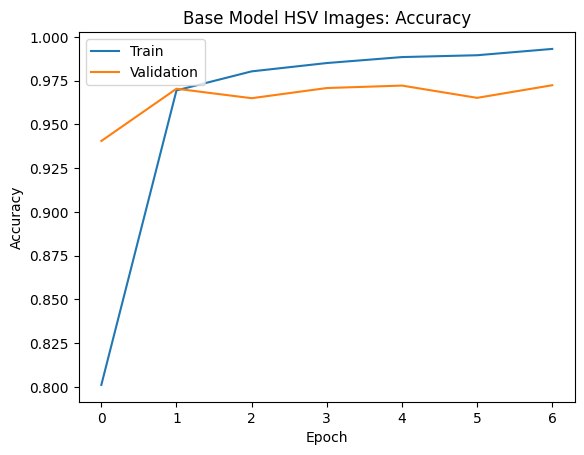

In [64]:
plt.plot(history_base_hsv.history['accuracy'])

plt.plot(history_base_hsv.history['val_accuracy'])

plt.title('Base Model HSV Images: Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()


<b> Plotting the confusion matrix

In [65]:
#Making predictions on the test data
y_pred_test = model_base_hsv.predict(X_test_hsv)

# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis =1)

82/82 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



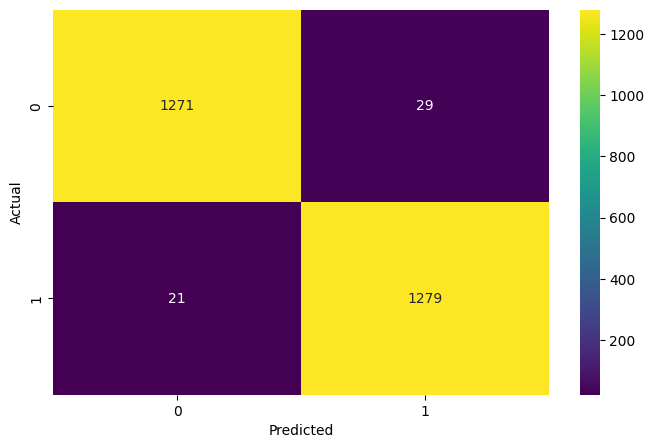

In [66]:
# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test_d, y_pred_test_classes))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test_d, y_pred_test_classes)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', cmap = 'viridis')

plt.ylabel('Actual')

plt.xlabel('Predicted')

# Display the plot
plt.show()

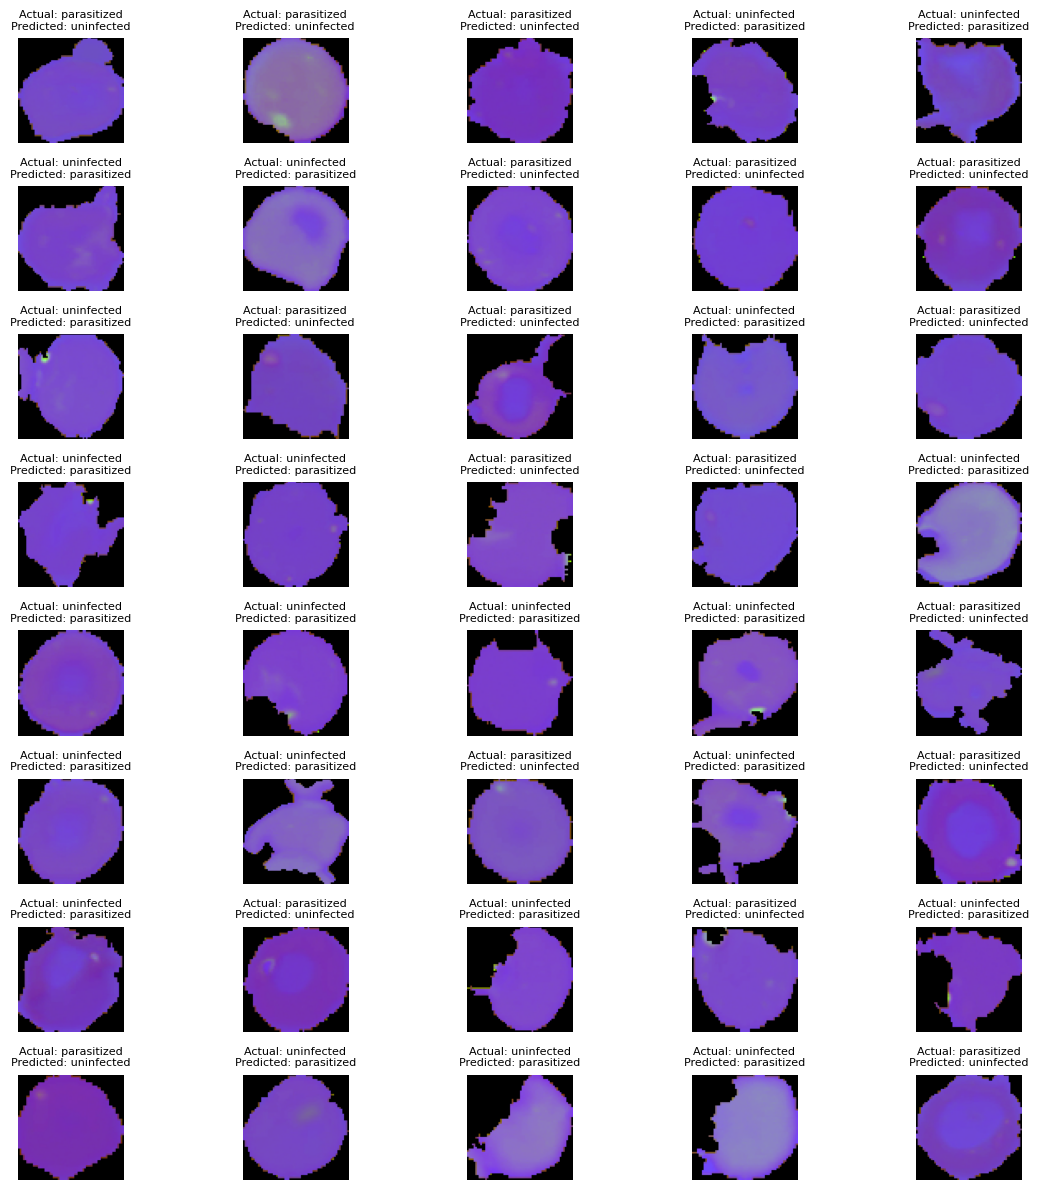

In [67]:
# Identify misclassifications of the same images in RGB
misclassified_indices = np.where(y_pred_test_classes != y_test_d)
n_plot = 40
# Take the first ten misclassified images from Actual abd Predicted Images
n_misclassified_indices = misclassified_indices[0][:n_plot]
n_misclassified_images = X_test_hsv[n_misclassified_indices]

#Labels for Actual Values
actual_labels = y_test.iloc[n_misclassified_indices]
# Reset the index
actual_labels = actual_labels.reset_index()

#Labels for predicted Values
predicted_labels = y_pred_test_classes[n_misclassified_indices]

# Convert numeric labels to string labels
InfectionStatus = np.array(['uninfected' if label == 0 else 'parasitized' for label in predicted_labels])
InfectionStatus = pd.DataFrame(InfectionStatus)

# Set a larger figure size
fig1 = plt.figure(figsize=(12, 12))

# Visualize misclassified images
for i in range(n_plot):
    plt.subplot(8, 5 , i + 1)
    plt.imshow(n_misclassified_images[i])
    plt.title(f'Actual: {actual_labels["Label"][i]}\nPredicted: {InfectionStatus[0][i]}', fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

## Base Model Gaussian Blur Images

###<b> Compiling the model

In [68]:
def cnn_model_base():
  #Initializing a sequential model
  model = Sequential()

  #Adding Convolution Layer: 16 filters and a kernel size of 3x3. Activation function layer ReLu . Padding 'same' and input shape (64, 64, 3)
  model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)))

  #Adding Convolution Layer: 32 filters and a kernel size of 3x3. Activation function layer ReLu. Padding 'same'
  model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

  #Max Pooling Layer pool size 2x2
  model.add(MaxPooling2D(pool_size = (2, 2)))

  #Adding Convolution Layer: 32 filters and a kernel size of 3x3. Activation function layer ReLu. Padding 'same'
  model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

  #Adding Convolution Layer: 64 filters and a kernel size of 3x3. activation = 'relu'. Padding 'same'
  model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same'))

  #Flatten layer
  model.add(Flatten())

  #Adding a fully connected layer with 512 units
  model.add(Dense(100 , activation = 'relu'))

  #Output Layer with 2 nodes and activation function Sigmoid
  model.add(Dense(2, activation = 'sigmoid'))

  #Compiling the model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  return model

model_base_blur = cnn_model_base()

model_base_blur.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 16)        4624      
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                      

### Fit and training the Base Model on Blur Images

In [69]:
# Clearing backend

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### Fit and training the Base Model on Blur Images



<b> Using Callbacks

In [70]:
# Define callbacks
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model_base_blur', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

<b> Fit and train our Model

In [71]:
history_base_blur = model_base_blur.fit(
  X_train_blur, y_train_encoded,
  epochs = 20,
  validation_split = 0.2,
  batch_size = 32,
  verbose = 1,
  callbacks=[mc, es]
)

Epoch 1/20
623/624 [============================>.] - ETA: 0s - loss: 0.6182 - accuracy: 0.7070
Epoch 1: val_accuracy improved from -inf to 0.94411, saving model to best_model_base_blur
624/624 [==============================] - 9s 12ms/step - loss: 0.6178 - accuracy: 0.7073 - val_loss: 0.1723 - val_accuracy: 0.9441
Epoch 2/20
620/624 [============================>.] - ETA: 0s - loss: 0.1130 - accuracy: 0.9665
Epoch 2: val_accuracy improved from 0.94411 to 0.96935, saving model to best_model_base_blur
624/624 [==============================] - 7s 12ms/step - loss: 0.1128 - accuracy: 0.9666 - val_loss: 0.1001 - val_accuracy: 0.9694
Epoch 3/20
619/624 [============================>.] - ETA: 0s - loss: 0.0770 - accuracy: 0.9759
Epoch 3: val_accuracy improved from 0.96935 to 0.97055, saving model to best_model_base_blur
624/624 [==============================] - 7s 11ms/step - loss: 0.0772 - accuracy: 0.9760 - val_loss: 0.0929 - val_accuracy: 0.9706
Epoch 4/20
619/624 [====================

### Evaluation the model

<b>**Plotting the train and validation curves:**

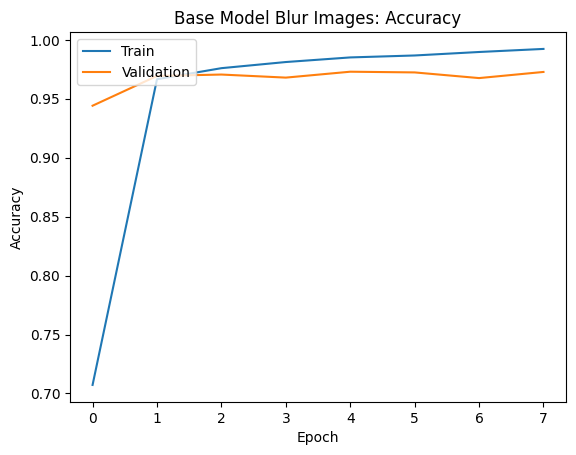

In [72]:
plt.plot(history_base_blur.history['accuracy'])

plt.plot(history_base_blur.history['val_accuracy'])

plt.title('Base Model Blur Images: Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()


<b> Plotting the confusion matrix

In [73]:
#Making predictions on the test data
y_pred_test = model_base_blur.predict(X_test_blur)

# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis =1)

82/82 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1300
           1       0.96      0.98      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



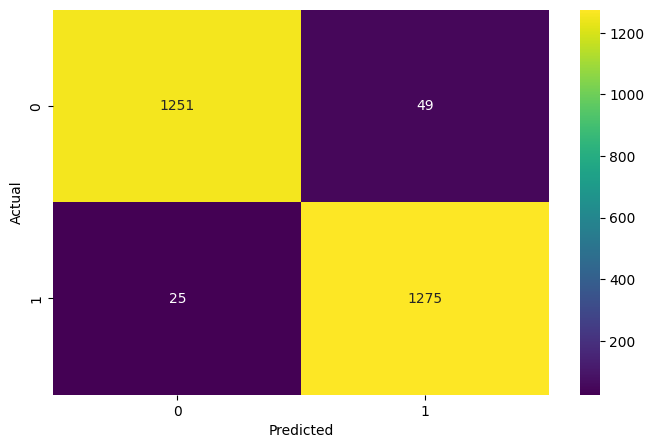

In [74]:
# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test_d, y_pred_test_classes))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test_d, y_pred_test_classes)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', cmap = 'viridis')

plt.ylabel('Actual')

plt.xlabel('Predicted')

# Display the plot
plt.show()

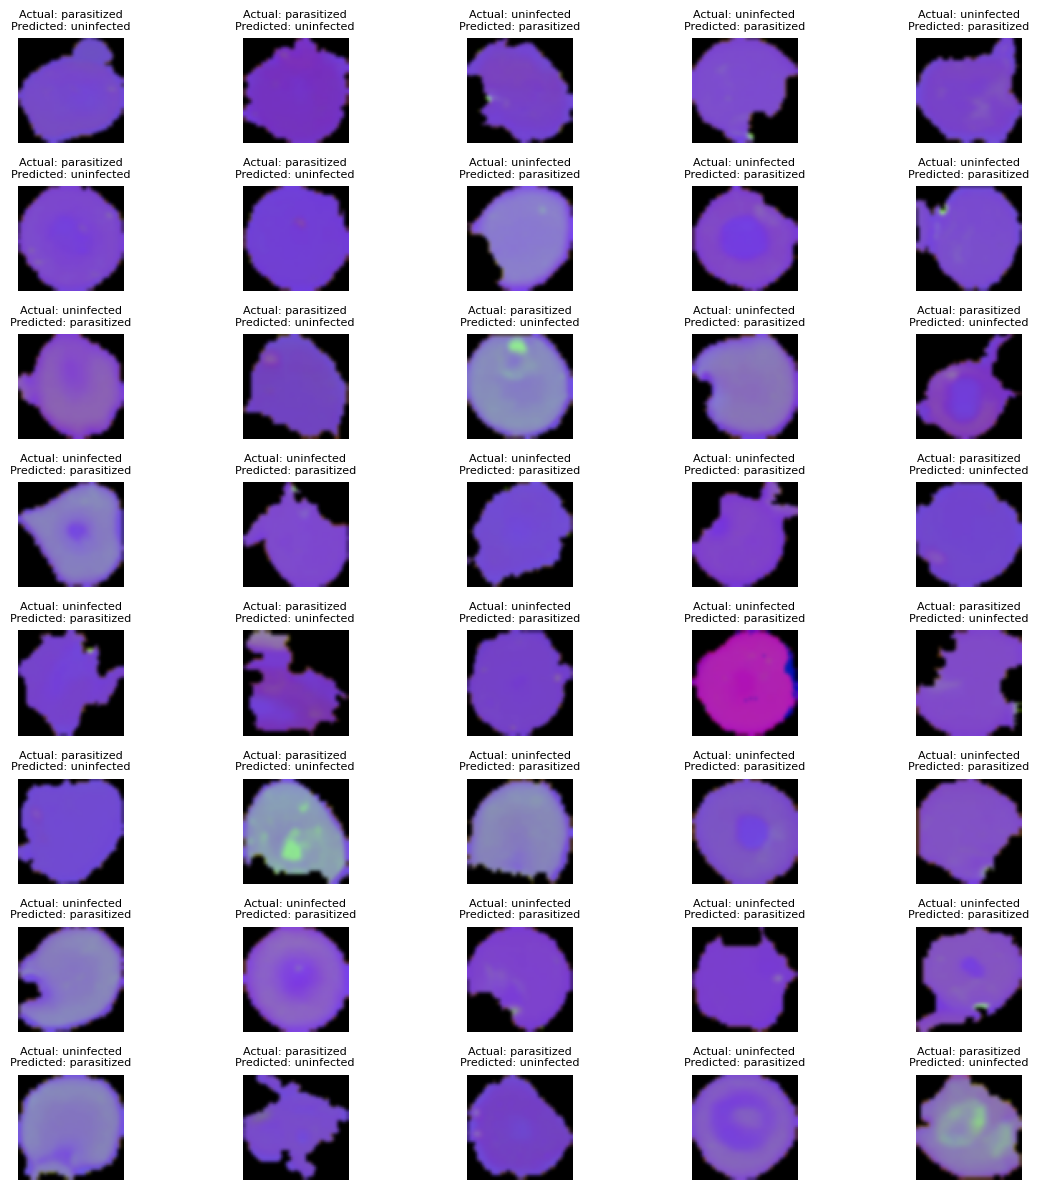

In [75]:
# Identify misclassifications of the same images in RGB
misclassified_indices = np.where(y_pred_test_classes != y_test_d)
n_plot = 40
# Take the first ten misclassified images from Actual abd Predicted Images
n_misclassified_indices = misclassified_indices[0][:n_plot]
n_misclassified_images = X_test_blur[n_misclassified_indices]

#Labels for Actual Values
actual_labels = y_test.iloc[n_misclassified_indices]
# Reset the index
actual_labels = actual_labels.reset_index()

#Labels for predicted Values
predicted_labels = y_pred_test_classes[n_misclassified_indices]

# Convert numeric labels to string labels
InfectionStatus = np.array(['uninfected' if label == 0 else 'parasitized' for label in predicted_labels])
InfectionStatus = pd.DataFrame(InfectionStatus)

# Set a larger figure size
fig1 = plt.figure(figsize=(12, 12))

# Visualize misclassified images
for i in range(n_plot):
    plt.subplot(8, 5 , i + 1)
    plt.imshow(n_misclassified_images[i])
    plt.title(f'Actual: {actual_labels["Label"][i]}\nPredicted: {InfectionStatus[0][i]}', fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Evaluate Base Model on RGB, HSV and Gaussian Blur

In [76]:
from keras.models import load_model

#Called best model for each option
model_norm = load_model('best_model_base_norm')
model_hsv = load_model('best_model_base_hsv')
model_blur = load_model('best_model_base_blur')

#Evaluate the models and Print Resuts

test_loss_norm, test_accuracy_norm = model_base_rgb.evaluate(X_test_norm, y_test_encoded)
test_loss_hsv, test_accuracy_hsv = model_base_hsv.evaluate(X_test_hsv, y_test_encoded)
test_loss_blur, test_accuracy_blur = model_base_blur.evaluate(X_test_blur, y_test_encoded)


print(f'Model Normalized: Test Accuracy: {test_accuracy_norm}')
print(f'Model HSV: Test Accuracy: {test_accuracy_hsv}')
print(f'Model Blur: Test Accuracy: {test_accuracy_blur}')

82/82 [==============================] - 0s 4ms/step - loss: 0.1402 - accuracy: 0.9715
Model Normalized: Test Accuracy: 0.982692301273346
Model HSV: Test Accuracy: 0.9807692170143127
Model Blur: Test Accuracy: 0.9715384840965271


### **Report on Dataset Comparison and Model Selection**

The previously conducted processes aimed to establish a foundational comparison for each dataset (RGB, HSV, and Blur).

This choice was influenced by the remarkable achievement of a notably high level of accuracy in nearly every model. In order to streamline subsequent procedures and maintain simplicity, the outcomes of this initial comparison will dictate the criteria for selecting images for the remaining models.

The model that demonstrated marginally superior accuracy is the one trained on ***normalized RGB images***. As a result, this dataset will serve as the reference for the subsequent models.

### **Possible problems of the models**
* Some parasitized cells were misclassified due to the parasite's position, especially those near the cell edges.
* Misclassification occurred when the parasite was too blurry for accurate detection. This problem was consistent on the three dataset of Images.
* The three models are exhibiting some issues of overfitting.



## Model 1 with RGB Images Normalized

###<b> Building the Model

In [77]:
# Clearing backend

backend.clear_session()

# Fixing the seed for random number generators:
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

###<b> Compiling the model

In [78]:
def cnn_model_1():
  #Initializing a sequential model
  model = Sequential()

  #Adding Convolution Layer: 16 filters and a kernel size of 3x3. Activation function layer ReLu . Padding 'same' and input shape (64, 64, 3)
  model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)))

  #Adding Convolution Layer: 32 filters and a kernel size of 3x3. Activation function layer ReLu. Padding 'same'
  model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

  #Max Pooling Layer pool size 2x2
  model.add(MaxPooling2D(pool_size = (2, 2)))

  #Adding Convolution Layer: 32 filters and a kernel size of 3x3. Activation function layer ReLu. Padding 'same'
  model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

  #Adding Convolution Layer: 32 filters and a kernel size of 3x3. Activation function layer ReLu. Padding 'same'
  model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

  #Max Pooling Layer pool size 2x2
  model.add(MaxPooling2D(pool_size = (2, 2)))

  #Adding Convolution Layer: 64 filters and a kernel size of 3x3. activation = 'relu'. Padding 'same'
  model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same'))

  #Adding Convolution Layer: 64 filters and a kernel size of 3x3. Activation function layer ReLu. Padding 'same'
  model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same'))

  #Max Pooling Layer pool size 2x2
  model.add(MaxPooling2D(pool_size = (2, 2)))

  #Flatten layer
  model.add(Flatten())

  #Adding a fully connected layer with 512 units
  model.add(Dense(100 , activation = 'relu'))

  #Dropout Layer rate=0.5
  model.add(Dropout(0.5))

  #Output Layer with 2 nodes and activation function Sigmoid
  model.add(Dense(2, activation = 'sigmoid'))

  #Compiling the model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  return model

model1 = cnn_model_1()

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        9280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                   

In [79]:
# Define callbacks
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model_rgb_1', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [80]:
history_rgb_1 = model1.fit(
  X_train_norm, y_train_encoded,
  epochs = 20,
  validation_split = 0.2,
  batch_size = 32,
  verbose = 1,
  callbacks=[mc, es]
)

Epoch 1/20
624/624 [==============================] - ETA: 0s - loss: 0.3962 - accuracy: 0.7758
Epoch 1: val_accuracy improved from -inf to 0.97536, saving model to best_model_rgb_1
624/624 [==============================] - 12s 14ms/step - loss: 0.3962 - accuracy: 0.7758 - val_loss: 0.0857 - val_accuracy: 0.9754
Epoch 2/20
623/624 [============================>.] - ETA: 0s - loss: 0.0795 - accuracy: 0.9742
Epoch 2: val_accuracy did not improve from 0.97536
624/624 [==============================] - 6s 10ms/step - loss: 0.0795 - accuracy: 0.9742 - val_loss: 0.0701 - val_accuracy: 0.9738
Epoch 3/20
620/624 [============================>.] - ETA: 0s - loss: 0.0665 - accuracy: 0.9785
Epoch 3: val_accuracy improved from 0.97536 to 0.97696, saving model to best_model_rgb_1
624/624 [==============================] - 8s 13ms/step - loss: 0.0662 - accuracy: 0.9786 - val_loss: 0.0656 - val_accuracy: 0.9770
Epoch 4/20
623/624 [============================>.] - ETA: 0s - loss: 0.0574 - accuracy: 

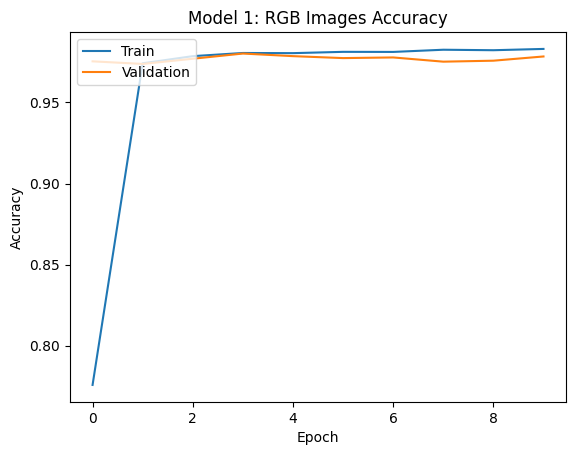

In [81]:
plt.plot(history_rgb_1.history['accuracy'])

plt.plot(history_rgb_1.history['val_accuracy'])

plt.title('Model 1: RGB Images Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [82]:
#Making predictions on the test data
y_pred_test = model1.predict(X_test_norm)

# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis =1)

82/82 [==============================] - 0s 3ms/step


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1300
           1       0.99      0.99      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



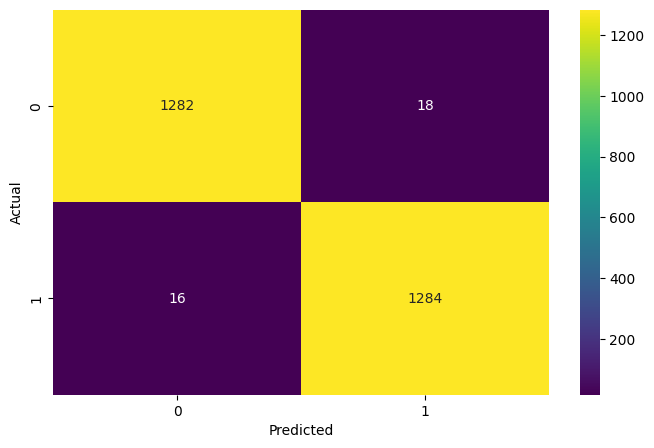

In [83]:
# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test_d, y_pred_test_classes))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test_d, y_pred_test_classes)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', cmap = 'viridis')

plt.ylabel('Actual')

plt.xlabel('Predicted')

# Display the plot
plt.show()

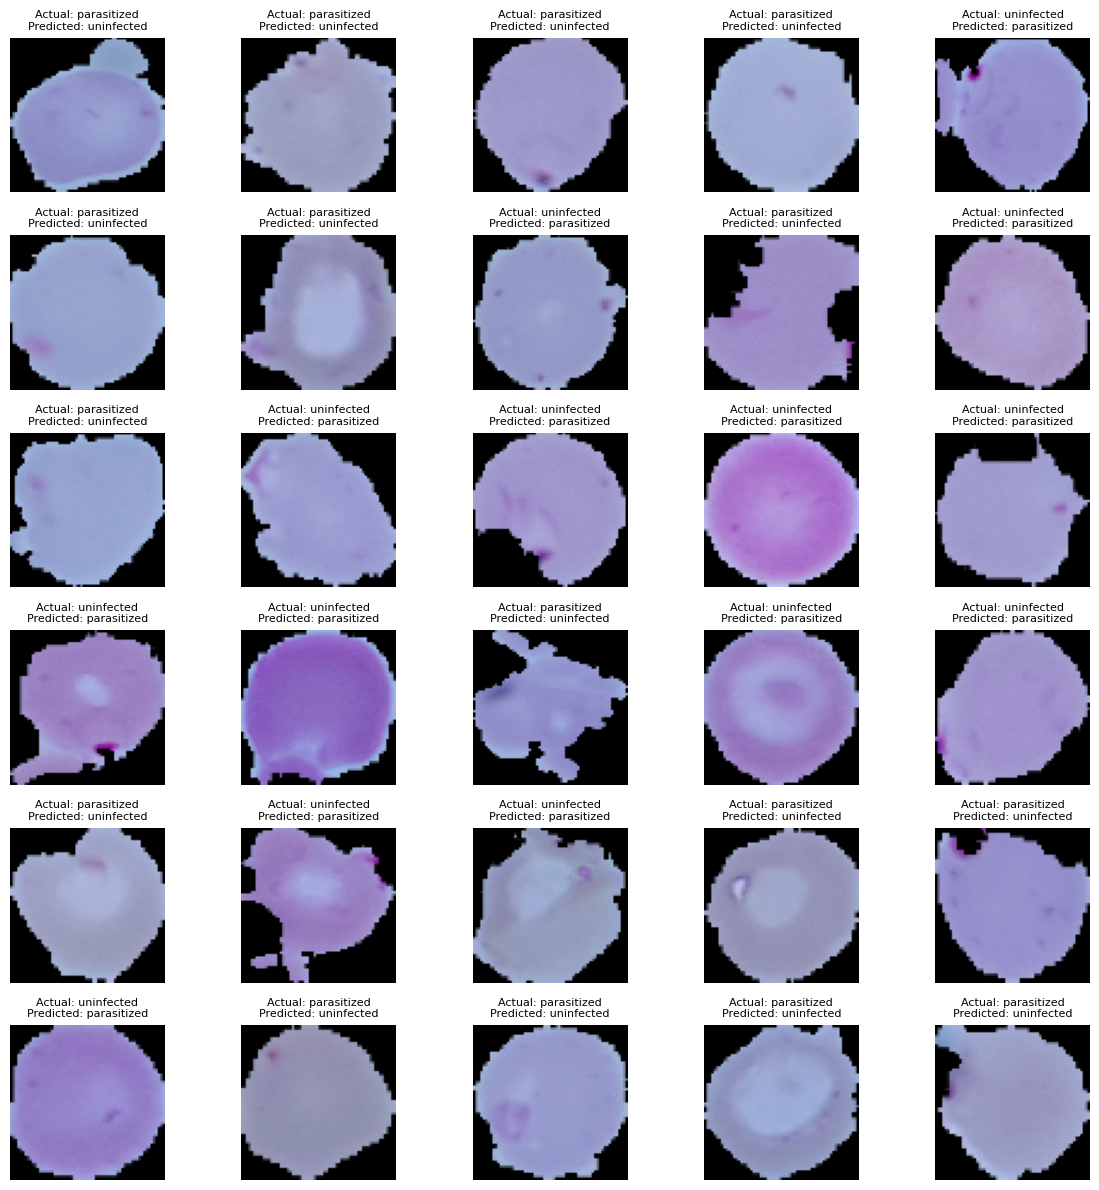

In [84]:
# Identify misclassifications of the same images in RGB
misclassified_indices = np.where(y_pred_test_classes != y_test_d)
n_plot = 30
# Take the first ten misclassified images from Actual abd Predicted Images
n_misclassified_indices = misclassified_indices[0][:n_plot]
n_misclassified_images = X_test_norm[n_misclassified_indices]

#Labels for Actual Values
actual_labels = y_test.iloc[n_misclassified_indices]
# Reset the index
actual_labels = actual_labels.reset_index()

#Labels for predicted Values
predicted_labels = y_pred_test_classes[n_misclassified_indices]

# Convert numeric labels to string labels
InfectionStatus = np.array(['uninfected' if label == 0 else 'parasitized' for label in predicted_labels])
InfectionStatus = pd.DataFrame(InfectionStatus)

# Set a larger figure size
fig1 = plt.figure(figsize=(12, 12))

# Visualize misclassified images
for i in range(n_plot):
    plt.subplot(6, 5 , i + 1)
    plt.imshow(n_misclassified_images[i])
    plt.title(f'Actual: {actual_labels["Label"][i]}\nPredicted: {InfectionStatus[0][i]}', fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

### Observations and Insights:

* **Consistency with Base Model:**

The results of the classified images closely resemble those of the Base Model. However, the noteworthy aspect is that this model successfully overcomes the overfitting problem, and it's recognizing most of the parasitized cells with parasites on the edges.

* **Challenges in Classification:**


The two most challenging issues encountered during the classification in this model are:

1. ***Background Variations:*** Changes in the background can be confusing for the model.
2. ***Misclassification of Infected Cells:*** It can be asserted that some cells, which appear infected, were initially classified as Uninfected. This observation aligns with the fact that the process involves a person counting parasites on a microscope, introducing the possibility of human mistakes. Despite this, I consider it as positive news: the model is adept at capturing misclassified images in the lab. This capability could potentially lead to more accurate real-life results and diagnoses.

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

## Model 2 with Batch Normalization

In [85]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


###<b> Building the Model

In [86]:
def cnn_model_2():
  #Initializing a sequential model
  model = Sequential()

  #Adding Convolution Layer: 16 filters and a kernel size of 3x3. Padding 'same' and input shape (64, 64, 3)
  model.add(Conv2D(16, (3, 3), padding = 'same', input_shape = (64, 64, 3)))

  #LeakyRelu Layer with slope 0.1
  model.add(LeakyReLU(alpha = 0.1))

  #Max Pooling Layer pool size 2x2
  model.add(MaxPooling2D(pool_size = (2, 2)))

  #Adding Convolution Layer: 32 filters and a kernel size of 3x3. Padding 'same'
  model.add(Conv2D(64, (3, 3), padding = 'same'))

  #LeakyReLu Layer with slope 0.1
  model.add(LeakyReLU(alpha = 0.1))

  #Batch Normalization
  model.add(BatchNormalization())

  #Adding Convolution Layer: 32 filters and a kernel size of 3x3. Padding 'same'
  model.add(Conv2D(32, (3, 3), padding = 'same'))

  #LeakyReLu Layer with slope 0.1
  model.add(LeakyReLU(alpha = 0.1))

  #Batch Normalization
  model.add(BatchNormalization())

  #Adding Convolution Layer: 32 filters and a kernel size of 3x3. Padding 'same'
  model.add(Conv2D(32, (3, 3), padding = 'same'))

  #LeakyReLu Layer with slope 0.1
  model.add(LeakyReLU(alpha = 0.1))

  #Max Pooling Layer pool size 2x2
  model.add(MaxPooling2D(pool_size = (2, 2)))

  #Adding Convolution Layer: 64 filters and a kernel size of 3x3. Padding 'same'
  model.add(Conv2D(64, (3, 3), padding = 'same'))

  #LeakyReLu Layer with slope 0.1
  model.add(LeakyReLU(alpha = 0.1))

  #Batch Normalization
  model.add(BatchNormalization())

  #Adding Convolution Layer: 64 filters and a kernel size of 3x3. Padding 'same'
  model.add(Conv2D(16, (3, 3), padding = 'same'))

  #LeakyReLu Layer with slope 0.1
  model.add(LeakyReLU(alpha = 0.1))

  #Flatten layer
  model.add(Flatten())

  #Adding a fully connected layer with 512 units
  model.add(Dense(100))

  #LeakyReLu Layer with slope 0.1
  model.add(LeakyReLU(alpha = 0.1))

  #Dropout Layer rate=0.5
  model.add(Dropout(0.5))

  #Output Layer with 2 nodes and activation function Sigmoid
  model.add(Dense(2, activation = 'sigmoid'))

  #Compiling the model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  return model

model2 = cnn_model_2()

model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        9280      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                         

<b> Using callbacks

In [87]:
# Define callbacks
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model_2', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

<b>Fit and train the model

In [88]:
history_2 = model2.fit(
  X_train_norm, y_train_encoded,
  epochs = 20,
  validation_split = 0.2,
  batch_size = 32,
  verbose = 1,
  callbacks=[mc, es]
)

Epoch 1/20
624/624 [==============================] - ETA: 0s - loss: 0.2636 - accuracy: 0.8859
Epoch 1: val_accuracy improved from -inf to 0.94451, saving model to best_model_2
624/624 [==============================] - 13s 15ms/step - loss: 0.2636 - accuracy: 0.8859 - val_loss: 0.1995 - val_accuracy: 0.9445
Epoch 2/20
624/624 [==============================] - ETA: 0s - loss: 0.0773 - accuracy: 0.9762
Epoch 2: val_accuracy did not improve from 0.94451
624/624 [==============================] - 6s 10ms/step - loss: 0.0773 - accuracy: 0.9762 - val_loss: 0.3884 - val_accuracy: 0.8528
Epoch 3/20
621/624 [============================>.] - ETA: 0s - loss: 0.0661 - accuracy: 0.9781
Epoch 3: val_accuracy improved from 0.94451 to 0.97776, saving model to best_model_2
624/624 [==============================] - 8s 12ms/step - loss: 0.0659 - accuracy: 0.9782 - val_loss: 0.0677 - val_accuracy: 0.9778
Epoch 4/20
620/624 [============================>.] - ETA: 0s - loss: 0.0677 - accuracy: 0.9764
E

###<b>Evaluating the model

<b>Plotting the train and validation accuracy

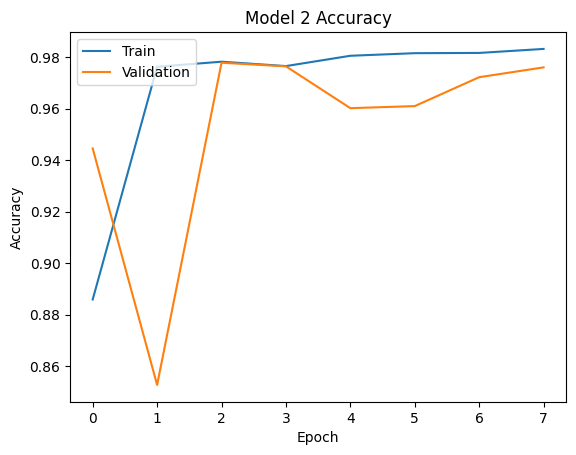

In [89]:
plt.plot(history_2.history['accuracy'])

plt.plot(history_2.history['val_accuracy'])

plt.title('Model 2 Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()


<b> Generate the classification report and confusion matrix

In [90]:
#Making predictions on the test data
y_pred_test = model2.predict(X_test_norm)

# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis =1)

82/82 [==============================] - 0s 4ms/step


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



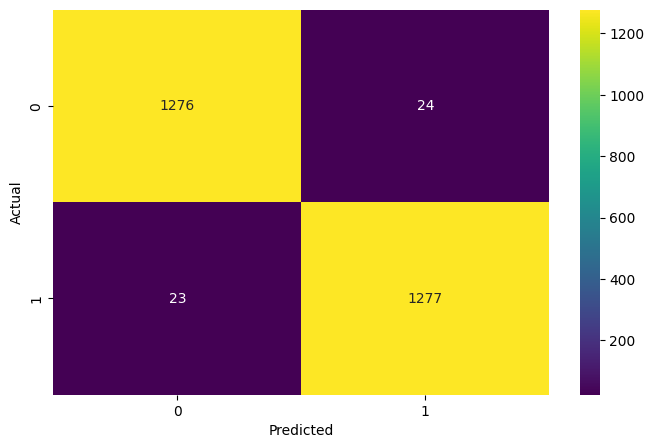

In [91]:
# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test_d, y_pred_test_classes))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test_d, y_pred_test_classes)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', cmap = 'viridis')

plt.ylabel('Actual')

plt.xlabel('Predicted')

# Display the plot
plt.show()

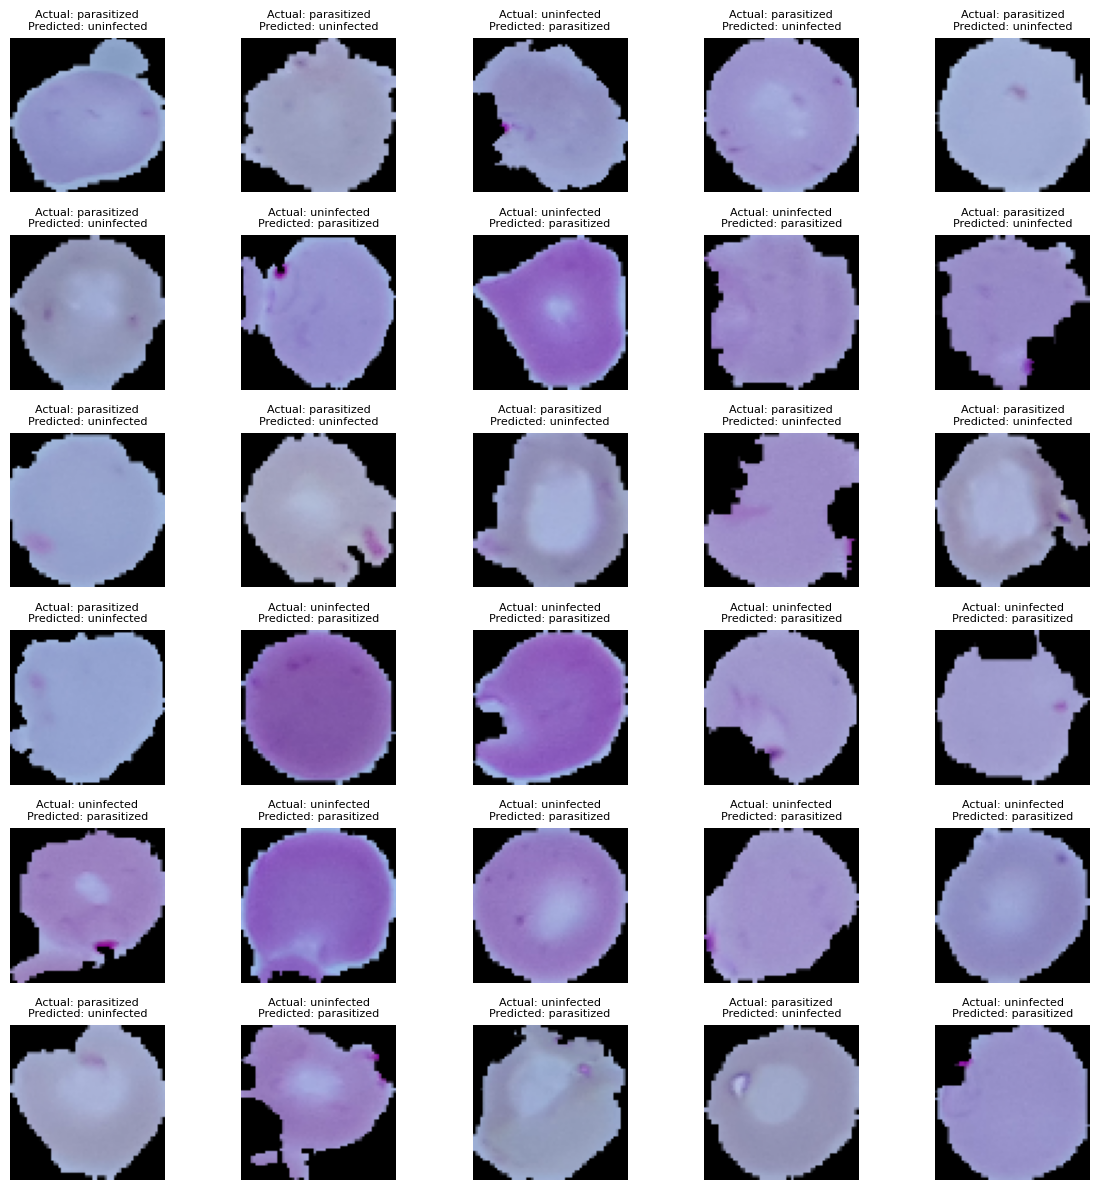

In [92]:
# Identify misclassifications
misclassified_indices = np.where(y_pred_test_classes != y_test_d)
n_plot = 30
# Take the first ten misclassified images from Actual abd Predicted Images
n_misclassified_indices = misclassified_indices[0][:n_plot]
n_misclassified_images = X_test_norm[n_misclassified_indices]

#Labels for Actual Values
actual_labels = y_test.iloc[n_misclassified_indices]
# Reset the index
actual_labels = actual_labels.reset_index()

#Labels for predicted Values
predicted_labels = y_pred_test_classes[n_misclassified_indices]

# Convert numeric labels to string labels
InfectionStatus = np.array(['uninfected' if label == 0 else 'parasitized' for label in predicted_labels])
InfectionStatus = pd.DataFrame(InfectionStatus)

# Set a larger figure size
fig1 = plt.figure(figsize=(12, 12))

# Visualize misclassified images
for i in range(n_plot):
    plt.subplot(6, 5 , i + 1)
    plt.imshow(n_misclassified_images[i])
    plt.title(f'Actual: {actual_labels["Label"][i]}\nPredicted: {InfectionStatus[0][i]}', fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

### Observations and insights:
* **Edge Recognition Issue:**

  This model revisits one of the issues encountered in the base model - it struggles to recognize parasites on the edges or in close proximity to the edges.
* **Continued Challenges with Background:**

  The persisting challenge involves issues with a misleading background, indicating a need for further improvement in the model's robustness.
* **Potential Dataset Anomaly:**

  It is conceivable that some cells classified as Uninfected, which were included in our dataset, may be erroneous. The model appears to be recognizing and highlighting this potential issue.

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





## Model 3 with Data Augmentation

In [93]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


###<b> Use image data generator

In [94]:
from sklearn.model_selection import train_test_split

X_trainDA, X_valDA, y_trainDA, y_valDA = train_test_split(X_train, y_train_encoded, test_size = 0.2, random_state = 42)

In [95]:
# Data Augmentation using ImageDataGenerator
#Train Dataset
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.2,
    brightness_range=[0.7, 1.5]
    )

#Validation and Validation Datasets
validation_datagen = ImageDataGenerator()

In [96]:
# Create Iterator
train_generator = train_datagen.flow(x= X_trainDA, y = y_trainDA,  batch_size = 1024 , shuffle =True)
validation_generator = validation_datagen.flow(x = X_valDA, y = y_valDA, batch_size = 1024, shuffle =True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

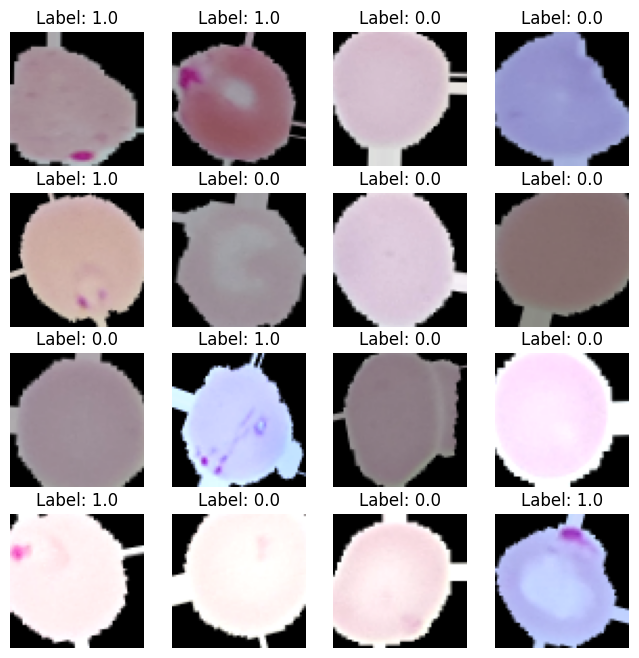

In [97]:
# Set the size of the figure
plt.figure(figsize=(8, 8))
# Plot our figures
for i in range(1, 17):
    plt.subplot(4, 4, i)

    # Extract images and labels from the batch
    images, labels = next(train_generator)

    plt.imshow(images[i].astype('uint8'))
    plt.title(f"Label: {labels[i, 1]}")

    # Hide the axis
    plt.axis('off')

plt.show()

#### **Observations and Insights:**

To address the primary challenges encountered by the models—misclassification of parasites on the edges, blurred parasites, and confusing backgrounds—I propose the following actions for the data augmentation process:

1. **Rotation:**
Rotation can vary the position of the parasite and the edges, providing additional perspectives for improved recognition.
2. **Width and Height Shifts:**
Applying slight random shifts to the width and height introduces variations in the parasite's position without losing it in the uniform background.
3. **Zoom:**
A gentle zoom can enhance the recognition of blurred parts of the parasites and their position on the cell.
4. **Shear:**
Introducing some deformation through shear may lead to a better position for the parasites to be detected.

###<b>Building the Model

The model used for this part is exactly the same as Model 2, with the addition of BatchNormalization layers and LeakyReLU layers.



In [98]:
def cnn_model_DA():
  #Initializing a sequential model
  model = Sequential()

  #Adding Convolution Layer: 16 filters and a kernel size of 3x3. Padding 'same' and input shape (64, 64, 3)
  model.add(Conv2D(16, (3, 3), padding = 'same', input_shape = (64, 64, 3)))

  #LeakyRelu Layer with slope 0.1
  model.add(LeakyReLU(alpha = 0.1))

  #Max Pooling Layer pool size 2x2
  model.add(MaxPooling2D(pool_size = (2, 2)))

  #Adding Convolution Layer: 32 filters and a kernel size of 3x3. Padding 'same'
  model.add(Conv2D(64, (3, 3), padding = 'same'))

  #LeakyReLu Layer with slope 0.1
  model.add(LeakyReLU(alpha = 0.1))

  #Batch Normalization
  model.add(BatchNormalization())

  #Adding Convolution Layer: 32 filters and a kernel size of 3x3. Padding 'same'
  model.add(Conv2D(32, (3, 3), padding = 'same'))

  #LeakyReLu Layer with slope 0.1
  model.add(LeakyReLU(alpha = 0.1))

  #Batch Normalization
  model.add(BatchNormalization())

  #Adding Convolution Layer: 32 filters and a kernel size of 3x3. Padding 'same'
  model.add(Conv2D(32, (3, 3), padding = 'same'))

  #LeakyReLu Layer with slope 0.1
  model.add(LeakyReLU(alpha = 0.1))

  #Max Pooling Layer pool size 2x2
  model.add(MaxPooling2D(pool_size = (2, 2)))

  #Adding Convolution Layer: 64 filters and a kernel size of 3x3. Padding 'same'
  model.add(Conv2D(64, (3, 3), padding = 'same'))

  #LeakyReLu Layer with slope 0.1
  model.add(LeakyReLU(alpha = 0.1))

  #Batch Normalization
  model.add(BatchNormalization())

  #Adding Convolution Layer: 64 filters and a kernel size of 3x3. Padding 'same'
  model.add(Conv2D(16, (3, 3), padding = 'same'))

  #LeakyReLu Layer with slope 0.1
  model.add(LeakyReLU(alpha = 0.1))

  #Flatten layer
  model.add(Flatten())

  #Adding a fully connected layer with 512 units
  model.add(Dense(100))

  #LeakyReLu Layer with slope 0.1
  model.add(LeakyReLU(alpha = 0.1))

  #Dropout Layer rate=0.5
  model.add(Dropout(0.5))

  #Output Layer with 2 nodes and activation function Sigmoid
  model.add(Dense(2, activation = 'sigmoid'))

  #Compiling the model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  return model

modelDA = cnn_model_DA()

modelDA.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        9280      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                         

<b>Using Callbacks

In [99]:
# Define callbacks
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model_DA', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

<b> Fit and Train the model

In [100]:
historyDA = modelDA.fit(train_generator,
                        validation_data = validation_generator,
                        batch_size = 32, callbacks = [mc, es],
                        epochs = 20, verbose = 1)

Epoch 1/20
20/20 [==============================] - ETA: 0s - loss: 0.8494 - accuracy: 0.5937
Epoch 1: val_accuracy improved from -inf to 0.50321, saving model to best_model_DA
20/20 [==============================] - 38s 2s/step - loss: 0.8494 - accuracy: 0.5937 - val_loss: 0.9152 - val_accuracy: 0.5032
Epoch 2/20
20/20 [==============================] - ETA: 0s - loss: 0.6029 - accuracy: 0.6936
Epoch 2: val_accuracy did not improve from 0.50321
20/20 [==============================] - 30s 2s/step - loss: 0.6029 - accuracy: 0.6936 - val_loss: 1.0244 - val_accuracy: 0.5032
Epoch 3/20
20/20 [==============================] - ETA: 0s - loss: 0.4672 - accuracy: 0.7920
Epoch 3: val_accuracy improved from 0.50321 to 0.53125, saving model to best_model_DA
20/20 [==============================] - 33s 2s/step - loss: 0.4672 - accuracy: 0.7920 - val_loss: 0.7958 - val_accuracy: 0.5312
Epoch 4/20
20/20 [==============================] - ETA: 0s - loss: 0.2075 - accuracy: 0.9252
Epoch 4: val_accu

###<B>Evaluating the model

<b>Plot the train and validation accuracy

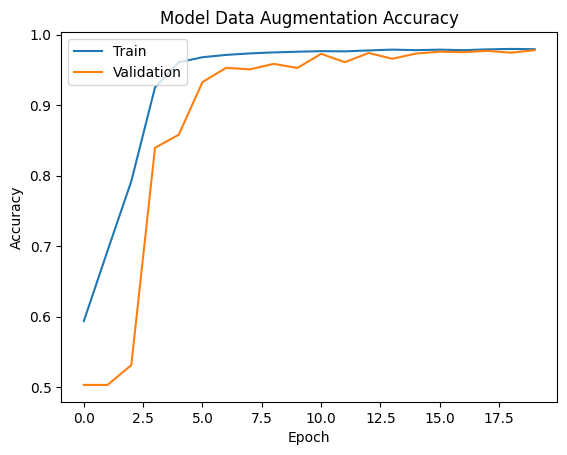

In [101]:
plt.plot(historyDA.history['accuracy'])

plt.plot(historyDA.history['val_accuracy'])

plt.title('Model Data Augmentation Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

<B>Plotting the classification report and confusion matrix

In [102]:
#Making predictions on the test data
y_pred_test = modelDA.predict(X_test)

# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis = 1)

82/82 [==============================] - 0s 3ms/step


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



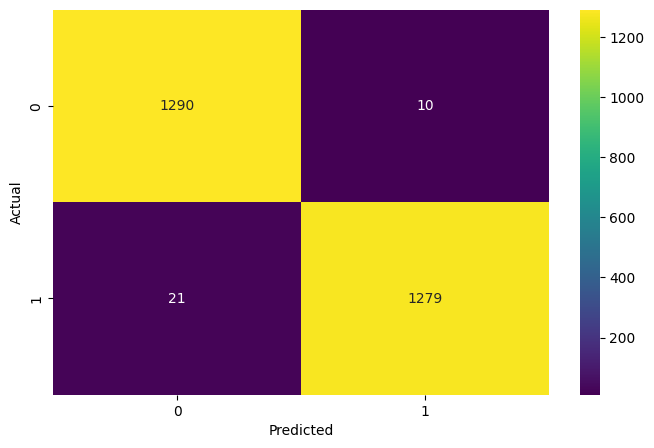

In [103]:
# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test_d, y_pred_test_classes))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test_d, y_pred_test_classes)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', cmap = 'viridis')

plt.ylabel('Actual')

plt.xlabel('Predicted')

# Display the plot
plt.show()

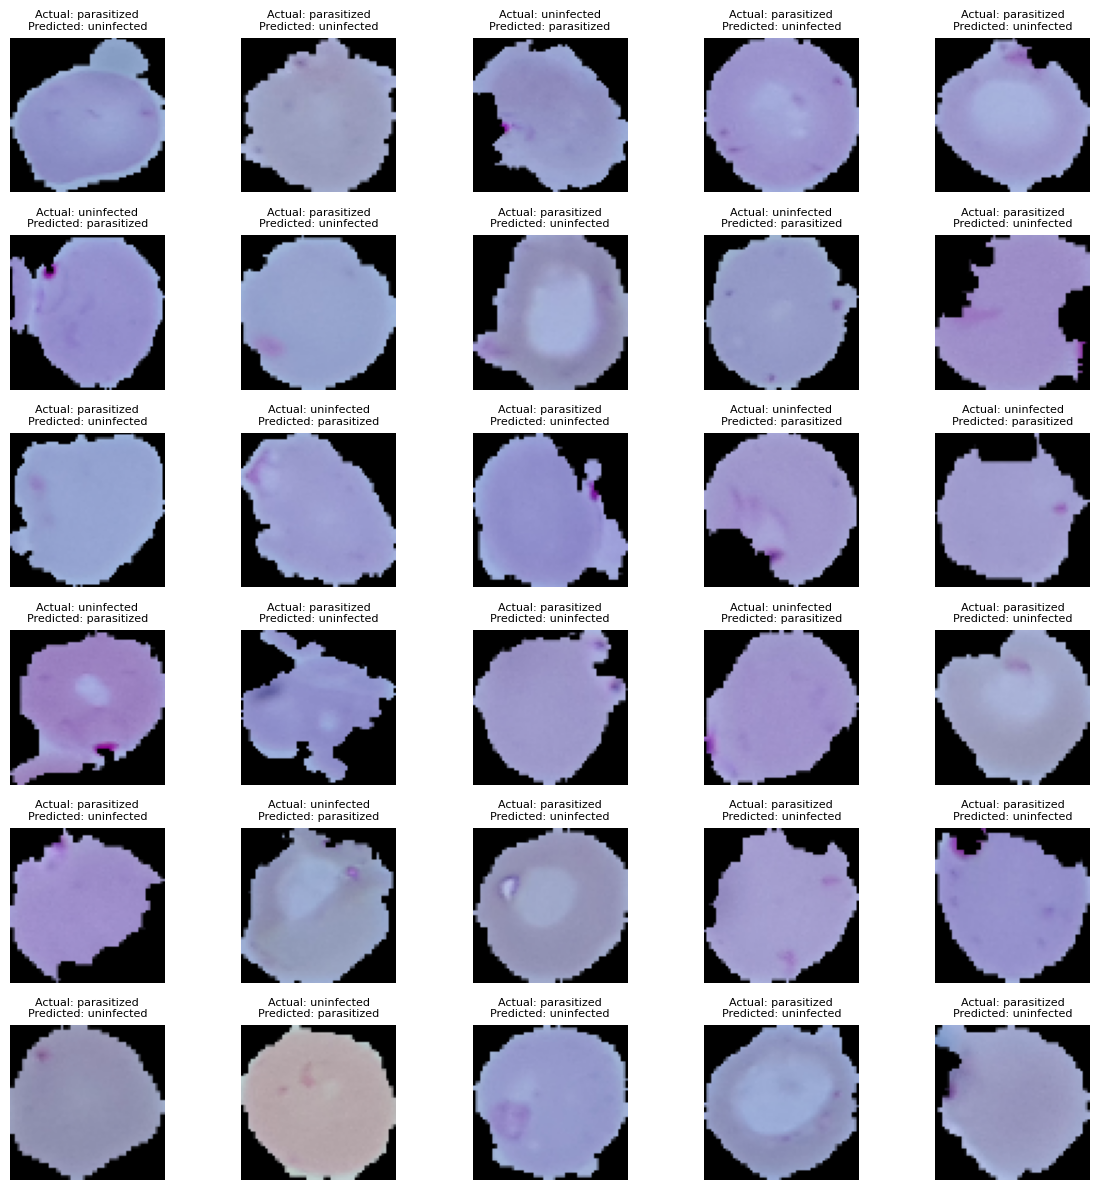

In [104]:
# Identify misclassifications
misclassified_indices = np.where(y_pred_test_classes != y_test_d)
n_plot = 30
# Take the first ten misclassified images from Actual abd Predicted Images
n_misclassified_indices = misclassified_indices[0][:n_plot]
n_misclassified_images = X_test[n_misclassified_indices]

#Labels for Actual Values
actual_labels = y_test.iloc[n_misclassified_indices]
# Reset the index
actual_labels = actual_labels.reset_index()

#Labels for predicted Values
predicted_labels = y_pred_test_classes[n_misclassified_indices]

# Convert numeric labels to string labels
InfectionStatus = np.array(['uninfected' if label == 0 else 'parasitized' for label in predicted_labels])
InfectionStatus = pd.DataFrame(InfectionStatus)

# Set a larger figure size
fig1 = plt.figure(figsize=(12, 12))

# Visualize misclassified images
for i in range(n_plot):
    plt.subplot(6, 5 , i + 1)
    plt.imshow(n_misclassified_images[i])
    plt.title(f'Actual: {actual_labels["Label"][i]}\nPredicted: {InfectionStatus[0][i]}', fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

### **Observations and Insights:**
* The model is experiencing difficulties with the same type of cells that were potentially pre-misclassified. However, considering the substantial amount of correctly classified data, this could lead to an improvement in real-life applications.
* The model did not improve its ability to classify blurred parasites.

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

## Model VGG16

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [126]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [127]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

In [128]:
# Checking summary of the model
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [129]:
transfer_layer = vgg_model.get_layer('block4_pool')

In [130]:
vgg_model.trainable = False

In [131]:
# Add classification layers on top of it
x = Flatten()(transfer_layer.output)

x = Dense(256, activation = 'relu')(x)

x = Dense(256, activation = 'relu')(x)

x = Dropout(0.3)(x)

x = Dense(128, activation = 'relu')(x)

x = Dropout(0.3)(x)

x = BatchNormalization()(x)

x = Dense(64, activation = 'relu')(x)

x = Dropout(0.3)(x)

x = BatchNormalization()(x)

pred = Dense(2, activation = 'sigmoid')(x)

# Initializing the model
model_vgg16 = Model(vgg_model.input, pred)

In [132]:
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

###<b>Compiling the model

In [133]:
# Compiling the model
model_vgg16.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])


<b> using callbacks

In [134]:
# Define callbacks
# The following lines of code saves the best model's parameters if training accuracy goes down on further training
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('best_model_VGG16', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

<b>Fit and Train the model

In [135]:
history_vgg16 = model_vgg16.fit(
  X_train_norm, y_train_encoded,
  epochs = 20,
  validation_split = 0.2,
  batch_size = 32,
  verbose = 1,
  callbacks=[mc, es]
)

Epoch 1/20
623/624 [============================>.] - ETA: 0s - loss: 0.3169 - accuracy: 0.8585
Epoch 1: val_accuracy improved from -inf to 0.95433, saving model to best_model_VGG16
624/624 [==============================] - 18s 24ms/step - loss: 0.3168 - accuracy: 0.8586 - val_loss: 0.1238 - val_accuracy: 0.9543
Epoch 2/20
624/624 [==============================] - ETA: 0s - loss: 0.1431 - accuracy: 0.9525
Epoch 2: val_accuracy did not improve from 0.95433
624/624 [==============================] - 11s 17ms/step - loss: 0.1431 - accuracy: 0.9525 - val_loss: 0.1627 - val_accuracy: 0.9453
Epoch 3/20
621/624 [============================>.] - ETA: 0s - loss: 0.1229 - accuracy: 0.9567
Epoch 3: val_accuracy improved from 0.95433 to 0.95954, saving model to best_model_VGG16
624/624 [==============================] - 13s 21ms/step - loss: 0.1228 - accuracy: 0.9568 - val_loss: 0.1078 - val_accuracy: 0.9595
Epoch 4/20
624/624 [==============================] - ETA: 0s - loss: 0.1019 - accuracy

<b>Plot the train and validation accuracy

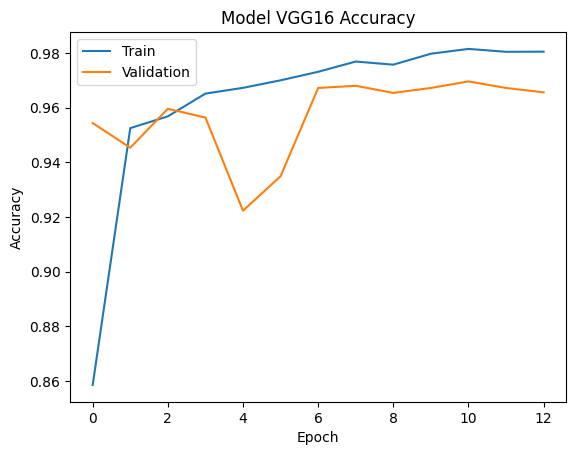

In [136]:
plt.plot(history_vgg16.history['accuracy'])

plt.plot(history_vgg16.history['val_accuracy'])

plt.title('Model VGG16 Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

###<b> Evaluating the model

In [137]:
#Making predictions on the test data
y_pred_test = model_vgg16.predict(X_test_blur)

# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis = 1)

82/82 [==============================] - 1s 11ms/step


<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1300
           1       0.74      0.66      0.70      1300

    accuracy                           0.71      2600
   macro avg       0.72      0.71      0.71      2600
weighted avg       0.72      0.71      0.71      2600



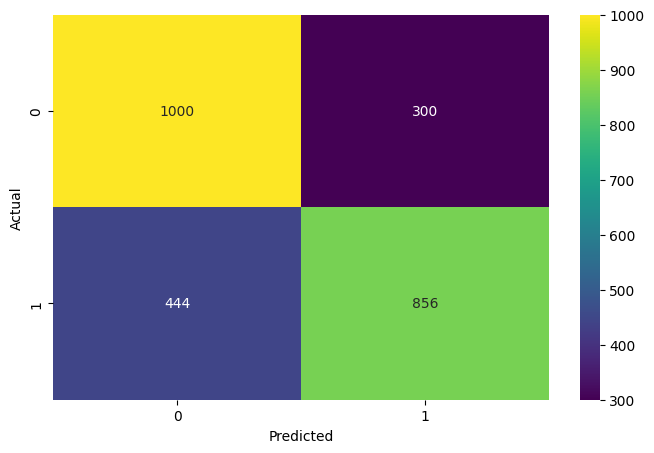

In [138]:
# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test_d, y_pred_test_classes))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test_d, y_pred_test_classes)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', cmap = 'viridis')

plt.ylabel('Actual')

plt.xlabel('Predicted')

# Display the plot
plt.show()

### **Observations and insights:**

* This model exhibits the most significant issues with overfitting among the tested models.
* Additionally, the model shows a severe detriment in the test results, providing further evidence of the overfitting problem.

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

# Evaluate Best Model

In [139]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [140]:
model_DA = load_model('best_model_DA')
test_loss_DA, test_accuracy_DA = modelDA.evaluate(X_test, y_test_encoded)

print(f'Model Data Augmentation: Test Accuracy: {test_accuracy_DA}')

82/82 [==============================] - 0s 5ms/step - loss: 0.0392 - accuracy: 0.9881
Model Data Augmentation: Test Accuracy: 0.98807692527771


In [141]:
from keras.models import load_model

# Assuming you have multiple models saved with different names
model_names = ['best_model_base_norm', 'best_model_rgb_1', 'best_model_2' , 'best_model_VGG16']

# Create a dictionary to store the loaded models
models = {}

# Load and store each model
for model_name in model_names:
    loaded_model = load_model(model_name)
    models[model_name] = loaded_model

# Compare models, for example, by evaluating on a test set
for model_name, model in models.items():
    test_loss, test_accuracy = model.evaluate(X_test_norm, y_test_encoded)
    print(f'Model: {model_name}, Test Accuracy: {test_accuracy}')

82/82 [==============================] - 1s 5ms/step - loss: 0.0545 - accuracy: 0.9850
Model: best_model_base_norm, Test Accuracy: 0.9850000143051147
82/82 [==============================] - 1s 5ms/step - loss: 0.0366 - accuracy: 0.9873
Model: best_model_rgb_1, Test Accuracy: 0.9873076677322388
82/82 [==============================] - 1s 5ms/step - loss: 0.0448 - accuracy: 0.9850
Model: best_model_2, Test Accuracy: 0.9850000143051147
82/82 [==============================] - 1s 12ms/step - loss: 0.1050 - accuracy: 0.9627
Model: best_model_VGG16, Test Accuracy: 0.9626923203468323


**Summary of Findings:**

* **Best Model:** ***Data Augmentation***
  * Almost no overfitting issues, performing exceptionally well on both Validation and Test datasets.
* **Overall Model Performance:**
  * Most models achieved impressive accuracy levels, hovering around 98%.
* **Base Model:**
  * Serves as the foundation for dataset comparison and model selection.
  * High accuracy but prone to misclassifying parasitized cells near edges and blurry parasites.
  * Overfitting issues observed across all three datasets (RGB, HSV, and Blur).
* **First Model (Base Model + Additional Layers):**
  * Builds upon the base model, achieving consistency while mitigating overfitting.
  * Recognizes parasitized cells at edges but faces challenges with background variations and recognizes the possible pre-misclassification problems.
* **Second Model (Base Model + LeakyReLU + Batch Normalization):**
  * Persists with challenges related to background and potential dataset anomalies.
* **Data Augmentation Model:**
  * Addresses misclassifications, particularly for possible pre-misclassified cells.
  * Ongoing challenges exist in classifying blurred parasites (less percentage).
* **VGG16 Model:**
  * Exhibits significant overfitting issues, resulting in a severe detriment in test results.

In conclusion, the Data Augmentation model stands out as the most effective, with minimal overfitting and strong performance on validation and test datasets.






#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

  * There is a possibility to correct some pre-misclassified data, potentially leading to improvement in real-life applications. This could result in better and faster diagnoses at the moment. However, it has to be checked with an expert to ensure the accuracy of this affirmation.

  * The models excel in detecting parasites on cells, with only a 1% to 2% error rate at the time of classification. Any errors encountered could be addressed with different methods or verified by an expert. This ultimately underscores the trustworthiness of the proposed model—the Data Augmentation model.


####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

  * A comprehensive analysis reveals that the Data Augmentation model consistently outperformed other techniques.

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

  * Ongoing research and experimentation could unveil supplementary strategies to enhance model effectiveness. For instance, exploring alternative approaches within the Data Augmentation strategy to address parasites on the edges and blur in the background could prove beneficial. Collaboration with experts in the field is also recommended to improve the collection of images, thereby mitigating these issues. Furthermore, I emphasize the importance of conducting a corroborative analysis on possible pre-misclassified cells.